# **Analysis & Prediction Modelling on Spaceship Titanic Dataset**

**Authors**: Eduardo Soto, Carlos Santiago Villa, Joo Han, Sebastian Rozas, Huy Tran, Juan Soto

----------------------------------------------

## **Introduction**

Visualize yourself setting off on a trip through the universe on the Spaceship Titanic, a spacecraft offering excitement and exploration in the immense realm of outer space. This trip, influenced by stories of discovery and the pursuit of understanding, shifts dramatically when a spacetime anomaly unexpectedly transports certain passengers to an unknown dimension, prompting contemplation on destiny, probability, and the factors influencing such occurrences.

Our investigation of this occurrence is conducted not via space travel or telescopes, but rather by analyzing data. By analyzing the Spaceship Titanic's records, which are included in an extensive dataset, we aim to identify patterns and predictors that may shed light on the circumstances surrounding the unexpected disappearance of certain passengers. This study uses machine learning to go through passenger data, looking at anything from cabin allocations to other personal details, in an attempt to determine the elements that may have affected their chances of being transported to the unknown.

Navigating the complexity of this task will require us to utilize a range of models and analytical tools to develop a good predictive model that can support in determining which passengers were and were not transported to an alternate dimension. We understand that our audience may not be as familiar with these statistical and technical methods as we are. Therefore, we are dedicated to interpreting our approach and findings into the most understandable and relatable language. 

Join us as we use data science tools to analyze this event, with the goal of extracting practical insights that, although based on a hypothetical situation, showcase the potential of using comparable methods to address real-world issues in similar matters.

Kaggle Competition Link: https://www.kaggle.com/competitions/spaceship-titanic

## **Top Three Actionable Insights**

### **Insight 1**: The Effect of Socio-Economic Status in Passenger Transportation Outcomes
While embarking on this journey through the universe the location of your cabin and the price of your ticket can impact your comfort and potentially affect your outcome during a crisis involving a mystery space anomaly. Our analysis of the data showed that passengers in higher-class cabins or those who had spent more on their tickets were at a greater risk during the anomaly. Wealth and higher socio-economic position did not guarantee safety, despite common assumptions. Instead, they appeared to be associated with an increased likelihood of being trapped in the anomaly's snare.

This surprising discovery is reminiscent of earlier calamities in which privilege provided no protection against the forces of nature or fate. It prompts us to rethink the idea that having a higher rank may protect us from all dangers, especially in the unfamiliar realms of space where the unknown operates according to its own principles. The universe does not differentiate based on income or the size of one's cabin. As we plan journeys to faraway stars, our planning and safety procedures must be equitable. Future space expeditions must guarantee that all passengers, irrespective of their socio-economic status, receive similar protection from unexpected hazards. It involves establishing a culture of shared safety that goes beyond societal barriers.

### **Insight 2**: Origin and Destination Echo in the Cosmos
The places we call home shape us in profound ways. Each world holds its own culture, its environment, and its own story. Our observations suggest that one's origin, the home planet, might have subtly influenced how passengers faced the spacetime anomaly of being transported. 

This realization makes us reflect on how deeply our roots develop within us, impacting not only our viewpoints but also our prospects in unknown circumstances. Although it may seem obvious that various environments shape various survival instincts, seeing this reflected in the universe as a whole, through data, provides a new perspective on how adaptive we are while also remaining deeply linked to our home worlds. This insight could be used to develop training programs that consider the diverse backgrounds of passengers, ensuring that safety measures are understandable and accessible to all, no matter their planetary upbringing.

On the other hand, the Titanic's occupants were traveling to various parts of space, each with the promise of making new beginnings. 

The data suggests an intriguing pattern: travelers' preferences for locations, such as the revolutionary hubs on TRAPPIST-1e or unknown regions of PSO J318.5-22, appeared to be related to their experiences during the anomaly. This insight draws attention to the importance of anticipation and preparation for the environment one is heading towards. The mindset of looking forward to a certain type of planet might affect one's resilience or vulnerability in unforeseen events.

### **Insight 3**: The Consequence of Cryosleep in Space Traveling
Passengers on the Spaceship Titanic could either stay awake to observe space's marvels or opt for cryosleep, which would allow them to skip the journey by entering a state of induced hibernation. Upon encountering the spacetime anomaly, the ship experienced something intriguing. The research indicates that passengers' outcomes during the anomaly differed based on their level of alertness.

Individuals in cryosleep, shielded from the ship's activities by advanced technology meant for comfort and effectiveness, appeared to be affected by the anomaly in an unsatisfactory way. Their suspended status seems to alter their interaction with cosmic forces, increasing their likelihood of being transported.

This pattern encourages us to reconsider the significance of cryosleep in space exploration. Although intended for protection throughout extended travels, it may lead to unanticipated consequences when faced with the capricious nature of space phenomena. The knowledge acquired is not just technical but also has practical implications for the future of space travel safety protocols and the utilization of cryosleep.
Our data indicates a necessity for additional research on optimizing cryosleep systems to protect passengers against these unexpected anomalies. This is an intriguing convergence of human decision-making, technical utilization, and the mysterious aspects of the universe. It serves as a reminder that our exploration of the cosmos is replete with paradoxes to unravel and safety measures to contemplate.


## **Conclusion**

The analysis on the Spaceship Titanic anomaly revealed that neither socio-economic position nor cultural influences from origin and destination could ensure safety in the presence of cosmic uncertainty. These findings call for the development safety measures that are both globally protective and culturally appropriate. The analysis shows that decisions regarding cryosleep technology have substantial repercussions leading to a reassessment of existing standards. As we analyze this data further, our developing framework supports a future in space exploration that emphasizes inclusion, readiness, and flexibility in the face of uncertainty, guaranteeing the safety of our cosmic expeditions for everyone.

----------------------------------------------

### **Importing Libraries**

In [1]:
#!pip install --upgrade seaborn matplotlib pandas
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tensorflow.keras import models, Sequential, layers, Model, metrics
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, concatenate
from tensorflow.keras.layers.experimental.preprocessing import Rescaling, RandomFlip, RandomRotation
import plotly.express as px
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
#!pip install --upgrade bottleneck
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

# setting seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

### **Data Path**

In [2]:
train_data = './data/train.csv'
test_data = './data/test.csv'
target_variable = 'Transported'

In [3]:
# loading training data from csv
space_df = pd.read_csv(train_data)
space_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

### Setting Up the Environment and Data Import

Specify the paths to training and test datasets, which are stored as `.csv` files. It also identifies the target variable, 'Transported', which indicates whether or not a passenger was transported to another dimension.

Finally, load the training data into a DataFrame named `space_df` 

### Quick Look at the Data

Each row represents a passenger, with columns for different attributes like 'HomePlanet', 'CryoSleep', and 'Destination', as well as various services they used on the spaceship, and finally, whether they were 'Transported'.

In [4]:
orange_palette = [
    '#FF8C00',  # Dark Orange
    '#FF7F50',  # Coral
    '#FF6347',  # Tomato
    '#FF4500',  # Orange Red
    '#FFD700',  # Gold
    '#FFA07A',  # Light Salmon
    '#FF7F50',  # Coral
    '#FF6347',  # Tomato
    '#FF4500',  # Orange Red
    '#FF8C00',  # Dark Orange
    '#FFA500',  # Orange
]

In [5]:
# plot function
def plot_line(space_df, model_name):

  figure = go.Figure()

  for col in space_df.columns:
    figure.add_trace(go.Scatter(x=space_df.index, y=space_df[str(col)], mode='lines', name=str(col)))

  figure.update_layout(title=f'Test and Training result for {model_name}',
                    xaxis_title='Epochs',
                    yaxis_title='Performance',
                    width=800,
                    height=600,
                    plot_bgcolor='white',
                    paper_bgcolor='white',
                    font=dict(color="black" ))
  figure.show()

In [6]:
# total missing values per variable function
def total_missing_values(space_df):
  total_missing_values = space_df.isna().sum().to_frame()
  total_missing_values = total_missing_values.rename(columns={0: 'total_missing_values'})
  total_missing_values['% of total'] = (total_missing_values['total_missing_values'] / space_df.shape[0]).round(2)*100
  print(total_missing_values)


  figure = px.bar(x=total_missing_values.index,
               y='total_missing_values',
               data_frame=total_missing_values,
               color=px.Constant('orange_palette'),  # This assigns all bars the same color group
                color_discrete_sequence=orange_palette)  # This sets the specific colors to use

  figure.update_layout(width=800,
                    height=600,
                    title={
                            'text': '<b>Total Missing values per Variable<b>',
                            'y':0.95,
                            'x':0.5,
                            'xanchor': 'center',
                            'yanchor': 'top',
                            'font': dict(family="Arial, sans-serif", size=18, color='black'),
                    },
                    xaxis_title = '<b>Variables<b>',
                    yaxis_title='<b>Total Missing Values<b>',
                    plot_bgcolor='white',
                    paper_bgcolor='white',
                    font=dict(color="black"),
                    showlegend=False,
                    xaxis=dict(
                        showgrid=True,  # Enable the X-axis gridlines
                        gridcolor='#cccccc'  # Set the gridline color to grey
                    ),
                    yaxis=dict(
                        showgrid=True,  # Enable the Y-axis gridlines
                        gridcolor='#cccccc'  # Set the gridline color to grey
                                    ))


  figure.show()

              total_missing_values  % of total
PassengerId                      0         0.0
HomePlanet                     201         2.0
CryoSleep                      217         2.0
Cabin                          199         2.0
Destination                    182         2.0
Age                            179         2.0
VIP                            203         2.0
RoomService                    181         2.0
FoodCourt                      183         2.0
ShoppingMall                   208         2.0
Spa                            183         2.0
VRDeck                         188         2.0
Name                           200         2.0
Transported                      0         0.0


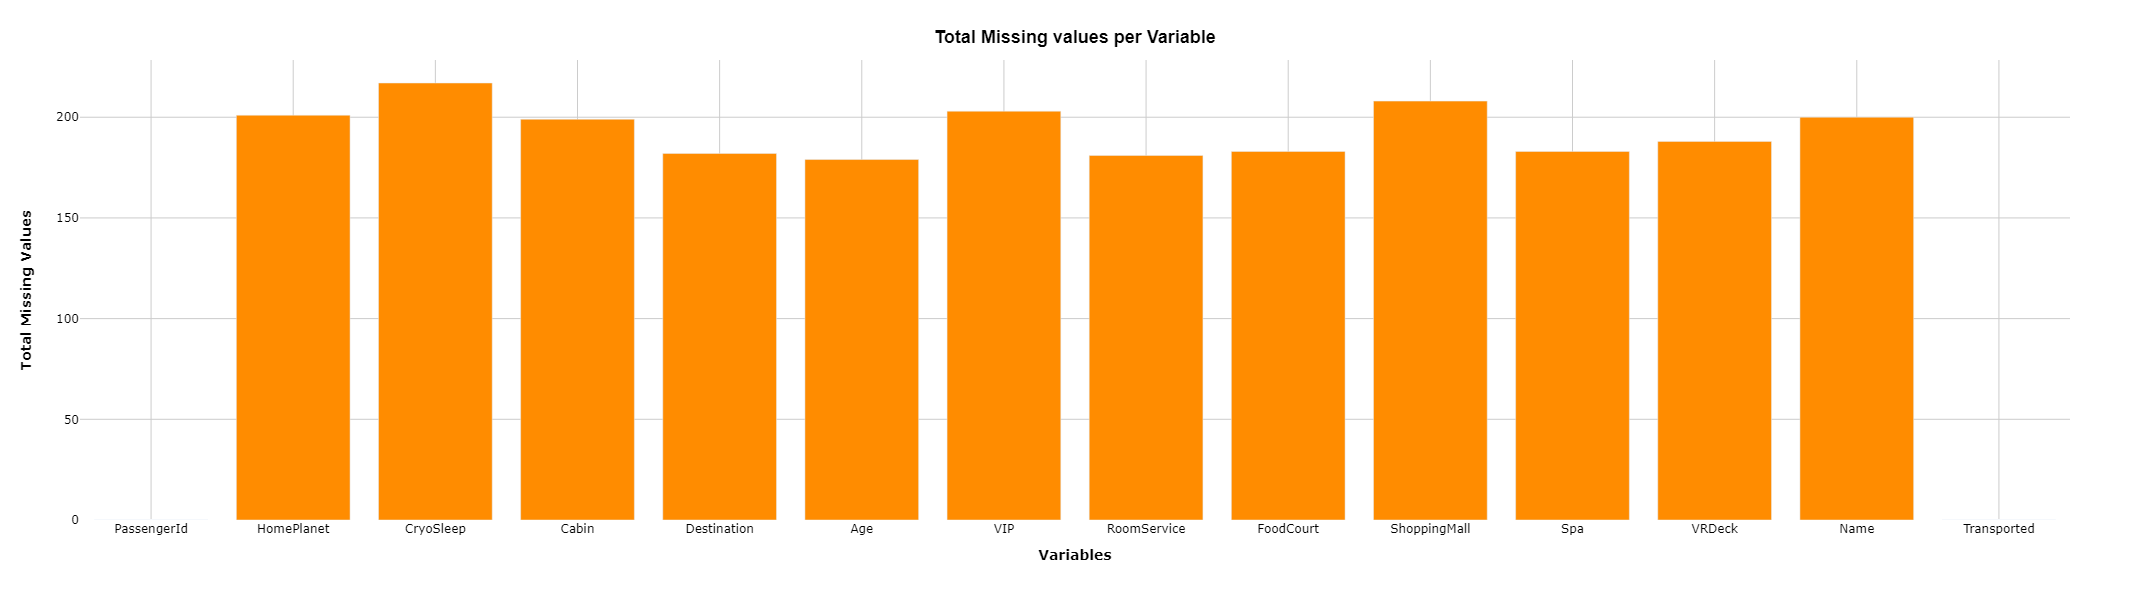

In [7]:
# reviewing total missing values
total_missing_values(space_df)

### Identifying Missing Data

To ensure the quality of the predictions, it's necessary to first check for any gaps in the data—places where information might be missing.

- The total number of missing values for each variable (column) in the dataset is calculated.
- These missing values are then expressed as a percentage of the total number of observations. 
- This approach aids in understanding the scale of missing data for each variable.
- A bar chart is used to visualize these missing values, allowing for easy identification of which variables have the most missing information.

#### Findings
- All variables range between the 160 to 220 missing values. 
- Variables such as Homeplanet, VIP, Shoppingmall have the highest nulls.
- On the other hand, variables such as Destination, Age and Room Service have the least null values. 

This step is crucial because missing data can significantly affect the analysis. It assists in determining whether more information needs to be collected, or if proceeding by filling in these gaps with estimated values is feasible.

### **Filling Missing Values / Setting Contraints**

In [8]:
for col in space_df.columns:
    if space_df[str(col)].dtypes == 'object':
      space_df[str(col)].fillna(space_df[str(col)].mode()[0], inplace=True)
    elif space_df[str(col)].dtypes == 'float64':
      space_df[str(col)].fillna(space_df[str(col)].mean().round(0), inplace=True)

space_df[['Deck', 'Cabin_num', 'Side']] = space_df['Cabin'].str.split('/', expand=True)
space_df['Cabin_num'] = space_df['Cabin_num'].astype(int)
space_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = space_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].astype(int)

space_df.loc[space_df['CryoSleep'] == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0

space_df.loc[space_df['CryoSleep'] == True, ['VIP']] = False
bool_column = space_df.select_dtypes(include='bool').columns

space_df[bool_column] = space_df[bool_column].astype(bool)

space_df_cleaned = space_df.drop(columns=['Cabin'], axis=1)
space_df_cleaned.head()

PassengerId HomePlanet  CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa      False  TRAPPIST-1e  39.0  False            0   
1     0002_01      Earth      False  TRAPPIST-1e  24.0  False          109   
2     0003_01     Europa      False  TRAPPIST-1e  58.0   True           43   
3     0003_02     Europa      False  TRAPPIST-1e  33.0  False            0   
4     0004_01      Earth      False  TRAPPIST-1e  16.0  False          303   

   FoodCourt  ShoppingMall   Spa  VRDeck               Name  Transported Deck  \
0          0             0     0       0    Maham Ofracculy        False    B   
1          9            25   549      44       Juanna Vines         True    F   
2       3576             0  6715      49      Altark Susent        False    A   
3       1283           371  3329     193       Solam Susent        False    A   
4         70           151   565       2  Willy Santantines         True    F   

   Cabin_num Side  
0          0    P  
1          0    S  
2          0    S  
3          0    S  
4          1    S

              total_missing_values  % of total
PassengerId                      0         0.0
HomePlanet                       0         0.0
CryoSleep                        0         0.0
Cabin                            0         0.0
Destination                      0         0.0
Age                              0         0.0
VIP                              0         0.0
RoomService                      0         0.0
FoodCourt                        0         0.0
ShoppingMall                     0         0.0
Spa                              0         0.0
VRDeck                           0         0.0
Name                             0         0.0
Transported                      0         0.0
Deck                             0         0.0
Cabin_num                        0         0.0
Side                             0         0.0


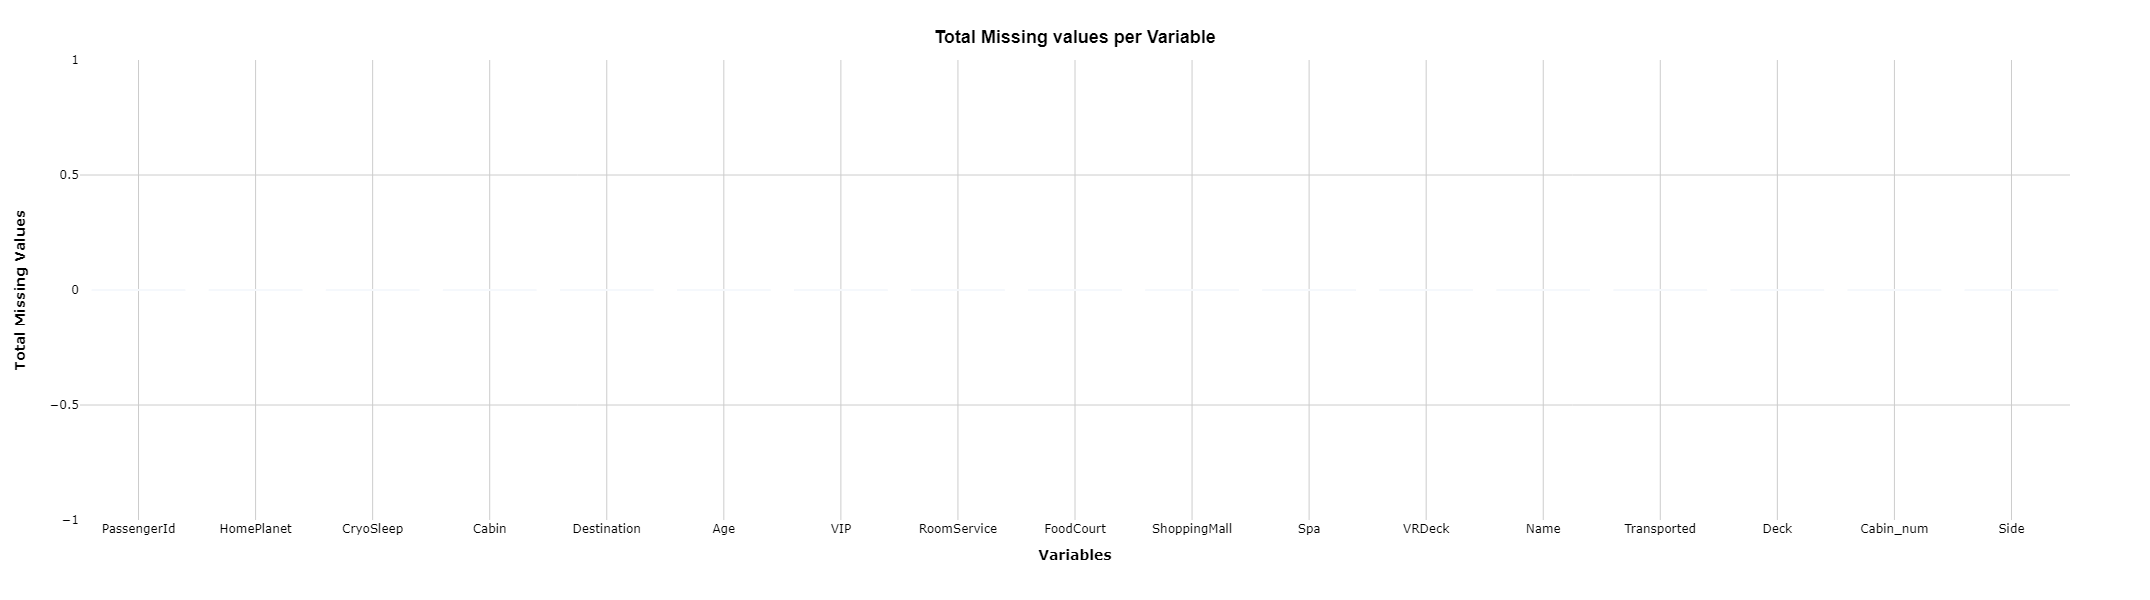

In [9]:
# Confirming that there are no missing values
total_missing_values(space_df)

Before analyzing the data, it's essential to ensure it's complete and well-organized:

- Missing information is filled in where possible. For text data, the most common value is used; for numerical data, the median is applied. This approach helps avoid errors stemming from gaps in the data.
- The 'Cabin' information is divided into three parts: 'Deck', 'Cabin_num', and 'Side'. This division aids in better understanding the passengers' locations.
- Certain rules are established: if a passenger was in cryosleep, it's assumed they didn't use any services like room service, and they didn't have VIP status.
- All true/false data is standardized into a consistent format that analysis tools can process effectively.
- The original 'Cabin' column is removed after breaking it down into more detailed components.

With these measures, the data becomes cleaner and more structured, enhancing the reliability of the analysis.

# **1. Exploratory Data Analysis**

### **1.1. Percentage of Transported & Not Transported**

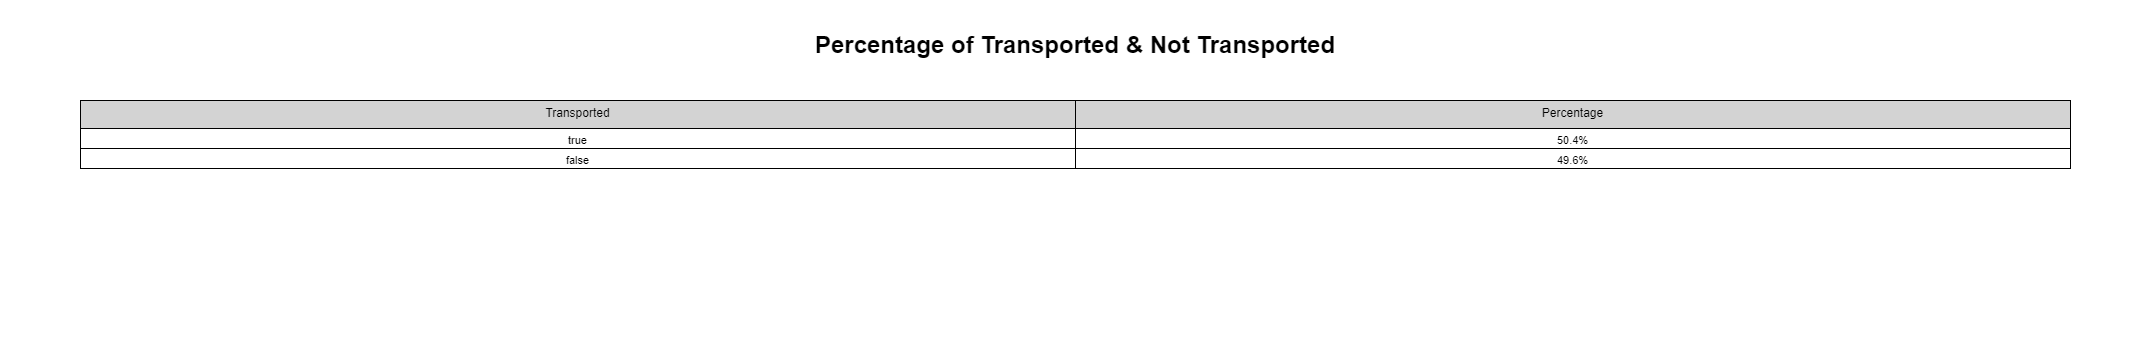

In [10]:
# Count for transported and not transported / converting to percentage
class_transported = space_df_cleaned['Transported'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

figure = go.Figure(data=[go.Table(
    header=dict(values=['Transported', 'Percentage'],
                fill_color='lightgrey',
                align='center',
                font=dict(color='black', size=12, family="Arial, sans-serif"),
                line_color='black',
                line_width=1),
    cells=dict(values=[class_transported.index, class_transported.values],
               fill_color='white',
               align='center',
               font=dict(color='black', size=11, family="Arial, sans-serif"),
               line_color='black',
               line_width=1)
)])

# Figure Layout
figure.update_layout(
    title={
        'text': '<b>Percentage of Transported & Not Transported</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(family="Arial, sans-serif", size=24, color='black'),
    },
    paper_bgcolor='white'
)

figure.show()

The data reveals a compelling equilibrium in analyzing the fate of individuals aboard the Spaceship Titanic: the count of passengers transported nearly matches those who were not. This balance is crucial for preventing bias in predictive models, ensuring no further adjustments are needed during model training. The subsequent table illustrates this harmony between the two passenger groups, providing a clear and straightforward depiction of the travel outcomes. It offers an intuitive yet informative snapshot of passenger experiences.

### **1.2. Age Distribution**

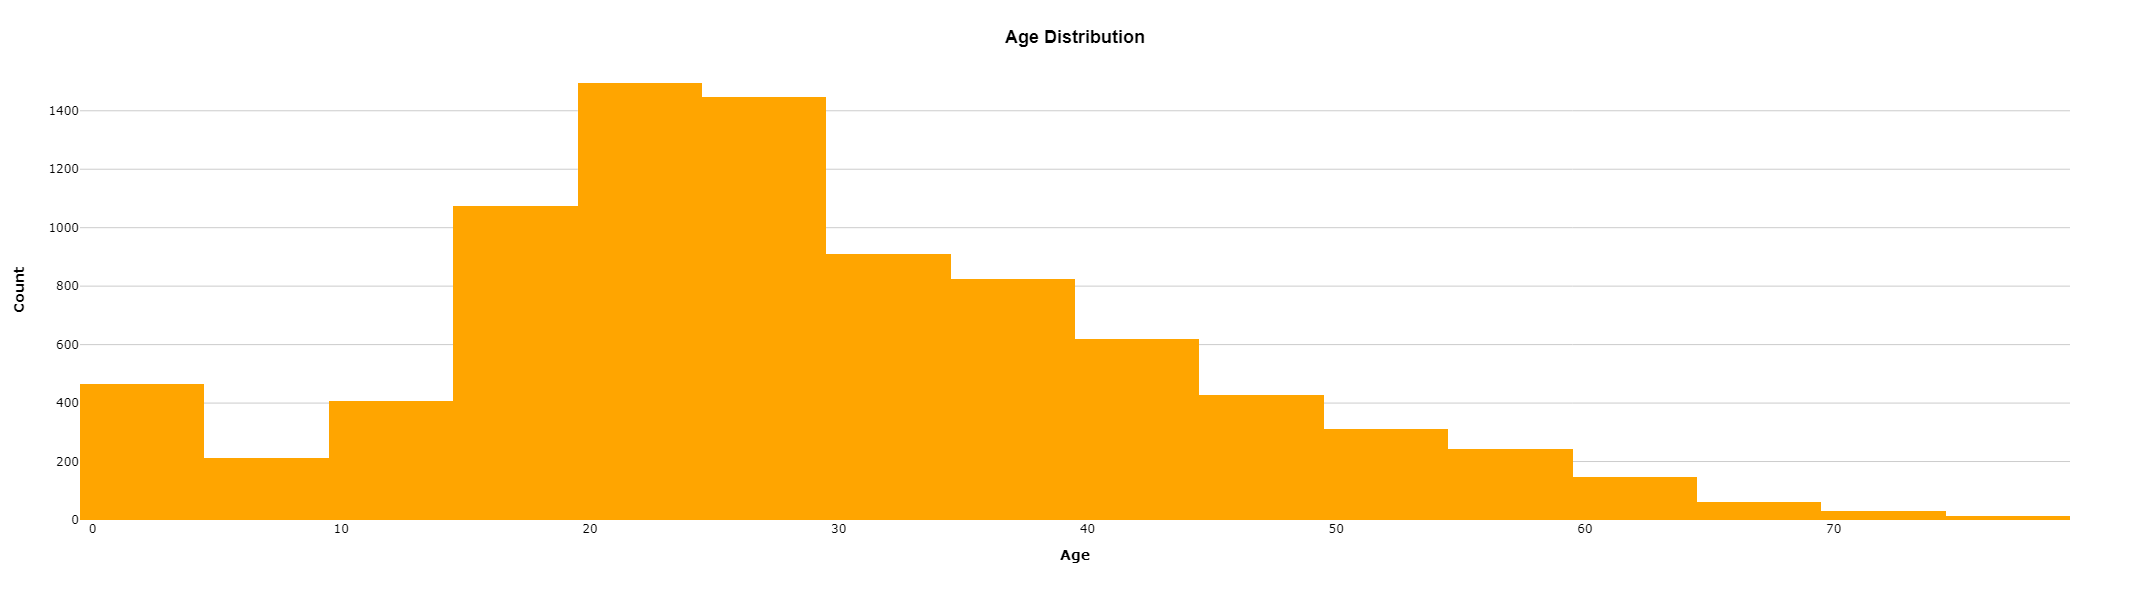

In [11]:
# histogram
figure = px.histogram(space_df_cleaned, x='Age', nbins=30)

# figure format
figure.update_layout(
    width=800,
    height=600,
    title={'text': '<b>Age Distribution<b>',
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(family="Arial, sans-serif", size=18, color='black'),
            },
    xaxis_title='<b>Age</b>',
    yaxis_title='<b>Count</b>', 
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    yaxis=dict(
        showgrid=True,  # Enable the Y-axis (horizontal) gridlines
        gridcolor='#cccccc'  # Set the gridline color to grey
    )
)

# Update the bar color to orange
figure.update_traces(marker_color='#FFA500')

figure.show()

Findings indicate that the age distribution chart for the Spaceship Titanic peaks in the 20–30 age range, highlighting a predominance of younger passengers. The data shows a noticeable decrease in older passengers, with the number of individuals declining as ages increase. For further details, refer to the visualization provided below.

### **1.3. Cabin Deck and Side Variables**

In [12]:
# Total passengers on categorical columns
space_df_agg = space_df_cleaned.groupby(['Transported', 'Deck', 'Side', 'VIP', 'CryoSleep', 'HomePlanet', 'Destination']).agg(passenger_count=('Name', 'count'),
                                                      spa_mean=('Spa', 'mean'),
                                                      room_service_mean=('RoomService', 'mean'),
                                                      food_court_mean=('FoodCourt', 'mean'),
                                                      shopping_mall_mean=('ShoppingMall', 'mean'),
                                                      vr_deck_mean=('VRDeck', 'mean')
                                                      ).reset_index()

space_df_agg.head()

Transported Deck Side    VIP  CryoSleep HomePlanet  Destination  \
0        False    A    P  False      False      Earth  55 Cancri e   
1        False    A    P  False      False      Earth  TRAPPIST-1e   
2        False    A    P  False      False     Europa  55 Cancri e   
3        False    A    P  False      False     Europa  TRAPPIST-1e   
4        False    A    P  False       True     Europa  55 Cancri e   

   passenger_count      spa_mean  room_service_mean  food_court_mean  \
0                1  11001.000000           0.000000      2506.000000   
1                1     65.000000           0.000000      2344.000000   
2               20   1096.200000         100.050000      1576.900000   
3               30   1405.566667         443.933333      1009.433333   
4                1      0.000000           0.000000         0.000000   

   shopping_mall_mean  vr_deck_mean  
0                46.0      5.000000  
1                 0.0   6898.000000  
2               135.5   1468.550000  
3               240.5   1805.466667  
4                 0.0      0.000000

In [13]:
# Changing ddtype to category
space_df_agg['Deck'] = space_df_agg['Deck'].astype('category')
space_df_agg['Side'] = space_df_agg['Side'].astype('category')
space_df_agg['Transported'] = space_df_agg['Transported'].astype('category')

# Changing ddtype to numeric
space_df_agg['passenger_count'] = pd.to_numeric(space_df_agg['passenger_count'], errors='coerce')

print(space_df_agg.dtypes)

Transported           category
Deck                  category
Side                  category
VIP                       bool
CryoSleep                 bool
HomePlanet              object
Destination             object
passenger_count          int64
spa_mean               float64
room_service_mean      float64
food_court_mean        float64
shopping_mall_mean     float64
vr_deck_mean           float64
dtype: object


By examining cabin locations, a clearer understanding of passengers' experiences aboard the ship emerges. This analysis involves:

- Grouping passengers based on their transportation status and cabin details, such as deck and side.
- Incorporating additional factors like VIP status, cryosleep state, home planet, and destination.
- Calculating the average expenditure per passenger on amenities like the spa, room service, and others.
- The aim is to discern how these various elements might influence a passenger's likelihood of being transported.
- A summary table is produced to provide an overview of these interconnections.

This process is akin to assembling clues in a mystery, compiling data to unravel the enigma of the spacetime anomaly.


### **1.4. Total Transported Passengers by Deck and Side**

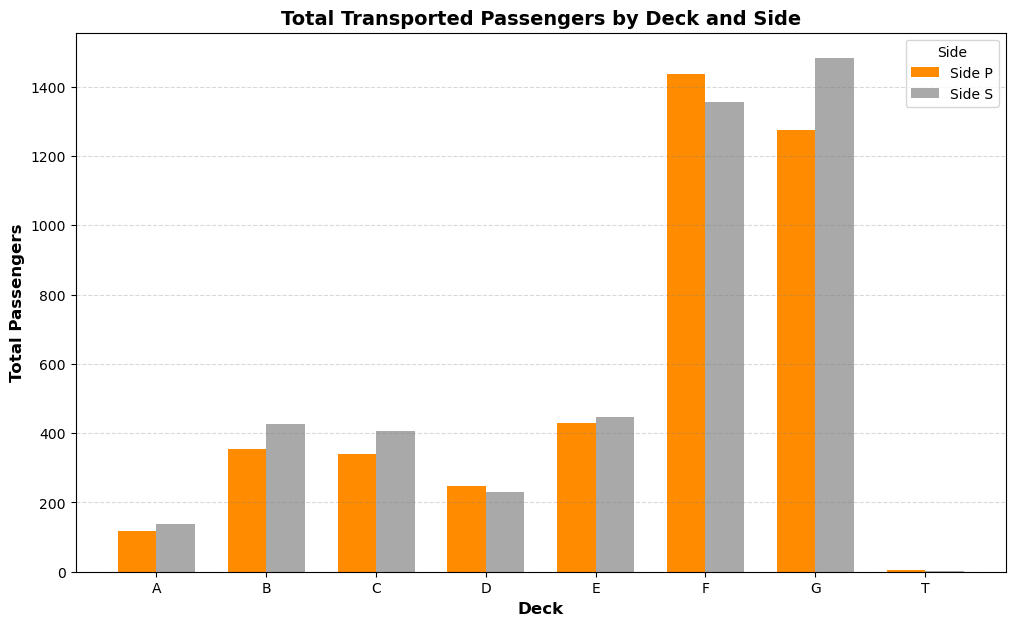

In [14]:
# Figure size and subplots
figure, ax = plt.subplots(figsize=(12, 7))

# Colors for the bars
colors = ['#FF8C00', 'darkgrey']

# Unique categories and indices
decks_unique = space_df_agg['Deck'].unique()
side_unique = space_df_agg['Side'].unique()
indices_deck = np.arange(len(decks_unique))

# Width of a bar in the bar plot
bar_width = 0.35

# Iterate over each 'Side' and plot bars with an offset
for i, side in enumerate(side_unique):
    # Subset the data for this side
    subset = space_df_agg[space_df_agg['Side'] == side]
    
    # Aggregate data by 'Deck' and calculate sum of 'passenger_count'
    counts = subset.groupby('Deck')['passenger_count'].sum()
    
    # Create an array with the position of each bar
    positions = indices_deck - bar_width/2. + i * bar_width
    
    # Plot the bars
    ax.bar(positions, counts, width=bar_width, label=f'Side {side}', color=colors[i])

# Set the position of the x-ticks to be in the middle of the grouped bars
ax.set_xticks(indices_deck)
ax.set_xticklabels(decks_unique)

# Adding labels and title
ax.set_xlabel('Deck', fontsize=12, fontweight='bold', color='black')
ax.set_ylabel('Total Passengers', fontsize=12, fontweight='bold', color='black')
ax.set_title('Total Transported Passengers by Deck and Side', fontsize=14, fontweight='bold', color='black')

# Set background color
ax.set_facecolor('white')
figure.patch.set_facecolor('white')
# Changing the font color to black and making it bold for all tick labels
plt.setp(ax.get_xticklabels(), color='black')
plt.setp(ax.get_yticklabels(), color='black')

# Adding legend
ax.legend(title='Side')

# Adding horizontal gridlines
ax.yaxis.grid(linestyle='--', color='grey', alpha=0.3)

plt.show()

### Visual Representation of Passenger Transport by Deck and Side
A bar chart has been developed to illustrate the distribution of transported passengers based on their cabin deck and ship side:

- The data was organized by 'Deck' and 'Side', counting the number of transported passengers in each category.
- Different colors were selected to clearly differentiate between the ship's sides in the chart.
- The data was represented through a bar chart, with bars for each side placed side by side according to deck. This layout facilitates an immediate comparison between the two sides.
- Titles, labels, and a legend were added to ensure the chart is easily interpretable at a glance.
- The chart was then displayed, offering a vivid visual summary that aids in identifying any patterns or trends regarding passengers' likelihood of transport.

### Analysis

- The data reveal that Decks B, F, and G had the highest numbers of transported passengers, with Deck G standing out prominently. 
- Conversely, Deck T showed a minimal count. Side P consistently had fewer transported passengers compared to Side S across most decks, with the largest discrepancy observed on Deck F. These findings suggest that the chance of being transported might be influenced by one's specific location on the ship, both by deck and by side.

### **1.5. Total Transported Passengers by Deck/Side and VIP Status**

<Figure size 1000x1000 with 0 Axes>

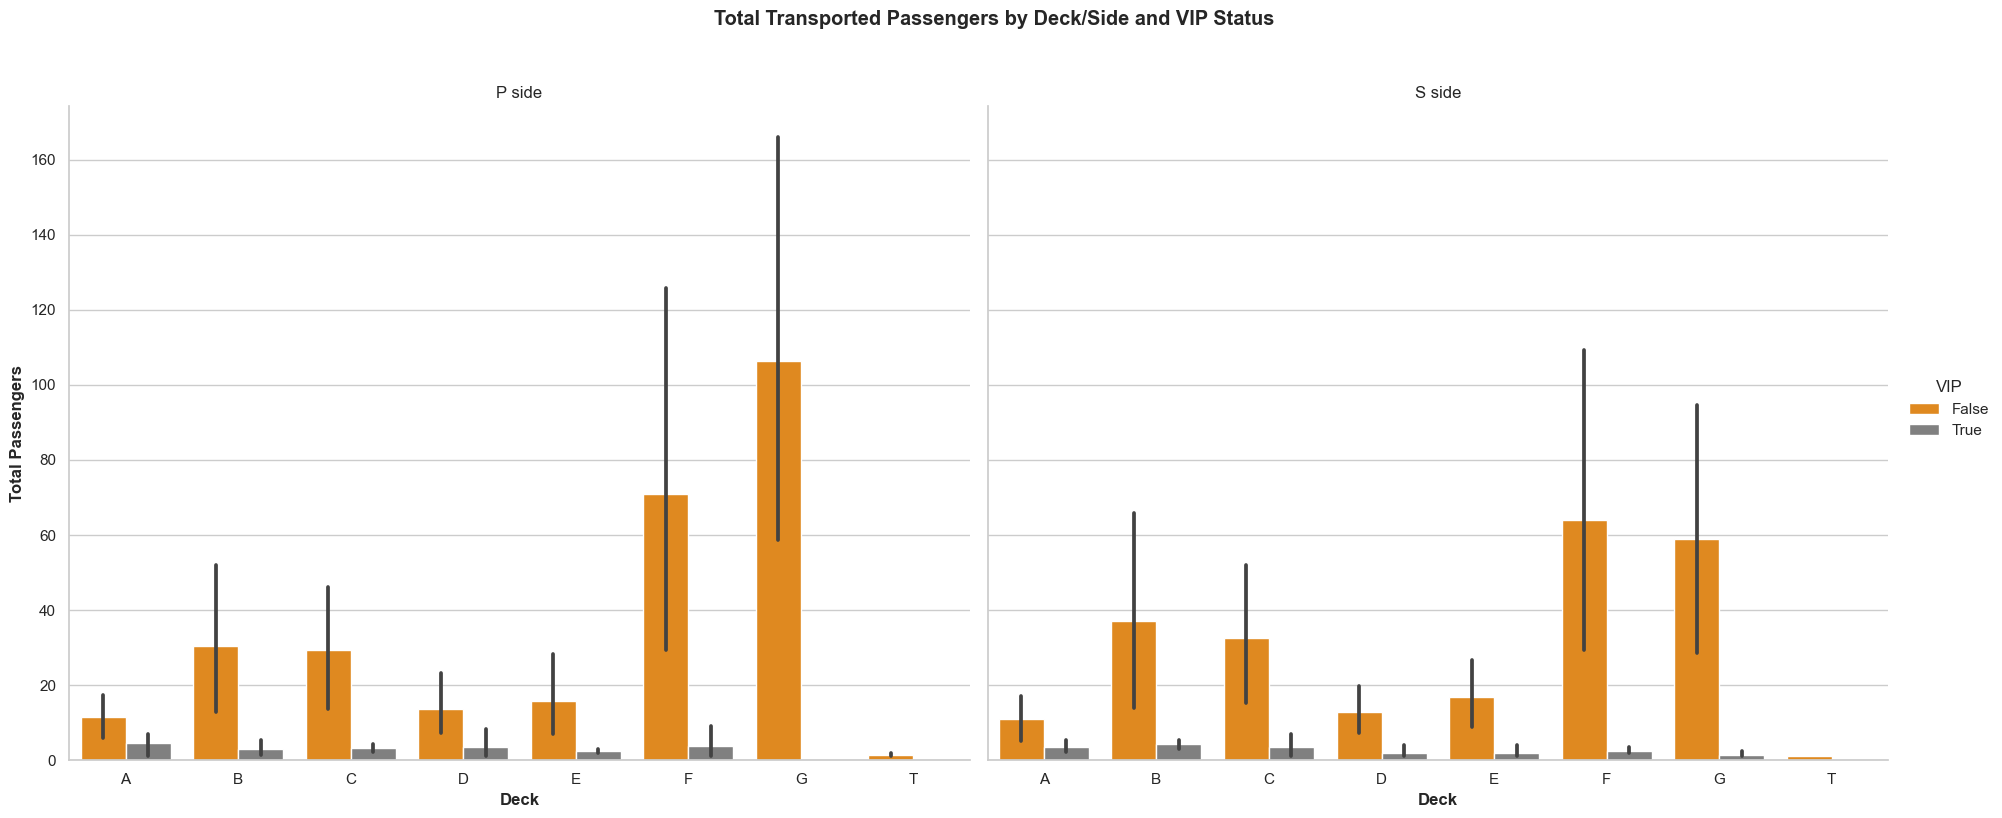

In [15]:

plt.figure(figsize=(10,10))
# Set the style of the seaborn plot to white background
sns.set(style="whitegrid")

# Create the catplot
g = sns.catplot(
    x='Deck',
    y='passenger_count',
    hue='VIP',
    col='Side',
    data=space_df_agg,  
    kind='bar',
    height=8,
    aspect=1.2,
    palette=['#FF8C00', 'grey'],  # Specify the colors for each hue category
)

# Set plot labels and title
g.set_axis_labels('Deck', 'Total Passengers').set_titles("{col_name} side")
g.figure.suptitle('Total Transported Passengers by Deck/Side and VIP Status', y=1.02, weight='bold')

# Adjust each subplot in the catplot
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), weight='bold')
    ax.set_ylabel(ax.get_ylabel(), weight='bold')
    ax.grid(axis='x', linestyle='', which='both')  # Disable vertical gridlines
    ax.grid(axis='y', linestyle='-', which='major')  # Enable horizontal gridlines

plt.subplots_adjust(top=0.9)  # Adjust the top to make space for suptitle

plt.show()

### Visualizing Passenger Transport by Deck, Side, and VIP Status
In this visualization, the relationship between a passenger's location on the ship, their VIP status, and the likelihood of being transported is explored:

- The seaborn library is utilized to generate a categorical plot (catplot) that segregates the data by deck and side, employing distinct colors to signify VIP status.
- This plot reveals the count of passengers within each category, facilitating the observation of whether being situated on a specific deck or side of the ship, or possessing VIP status, influences the chances of being transported.
- The objective is to detect patterns indicating whether a passenger's location or VIP status contributed to their experience during the spacetime anomaly.

### Findings
The analysis reveals a significant trend regarding the transportation of passengers based on VIP status and location on the ship:

- Among non-VIP ('False' VIP) passengers, a higher number of transported individuals were observed compared to VIP ('True' VIP) passengers. This trend suggests that VIP status did not necessarily enhance the likelihood of being transported during the spacetime anomaly.
- On the P side of the ship, Deck G had the highest number of transported non-VIP passengers, with 105 individuals, followed by Deck F with 70 passengers. This indicates that certain areas of the ship, particularly Deck G, saw a higher rate of passenger transportation.
- For VIP passengers, the decks with the highest counts of transported individuals were A and F on the P side, demonstrating that VIP passengers on these decks had a somewhat better chance of being transported.
- Similarly, on the S side, the deck with the most transported non-VIP passengers was F with 65 passengers, followed by G with 59 passengers. Again, Deck F emerges as a critical location for passenger transport.
- The decks with the highest numbers of transported VIP passengers on the S side were A and C, highlighting these areas as significant for VIP passenger transport.
- Summarizing the findings, non-VIP ('False' VIP) passengers had a higher transportation rate compared to VIP ('True' VIP) passengers across the board. Additionally, the P side of the ship exhibited a higher transportation values compared to the S side, suggesting that location and VIP status played a role in the transportation of passengers' during the anomaly, with non-VIP status and being on the P side correlating with a higher likelihood of transportation.

### **1.6. Total Transported Passengers by Deck/Side and Cryosleep**

<Figure size 1000x1000 with 0 Axes>

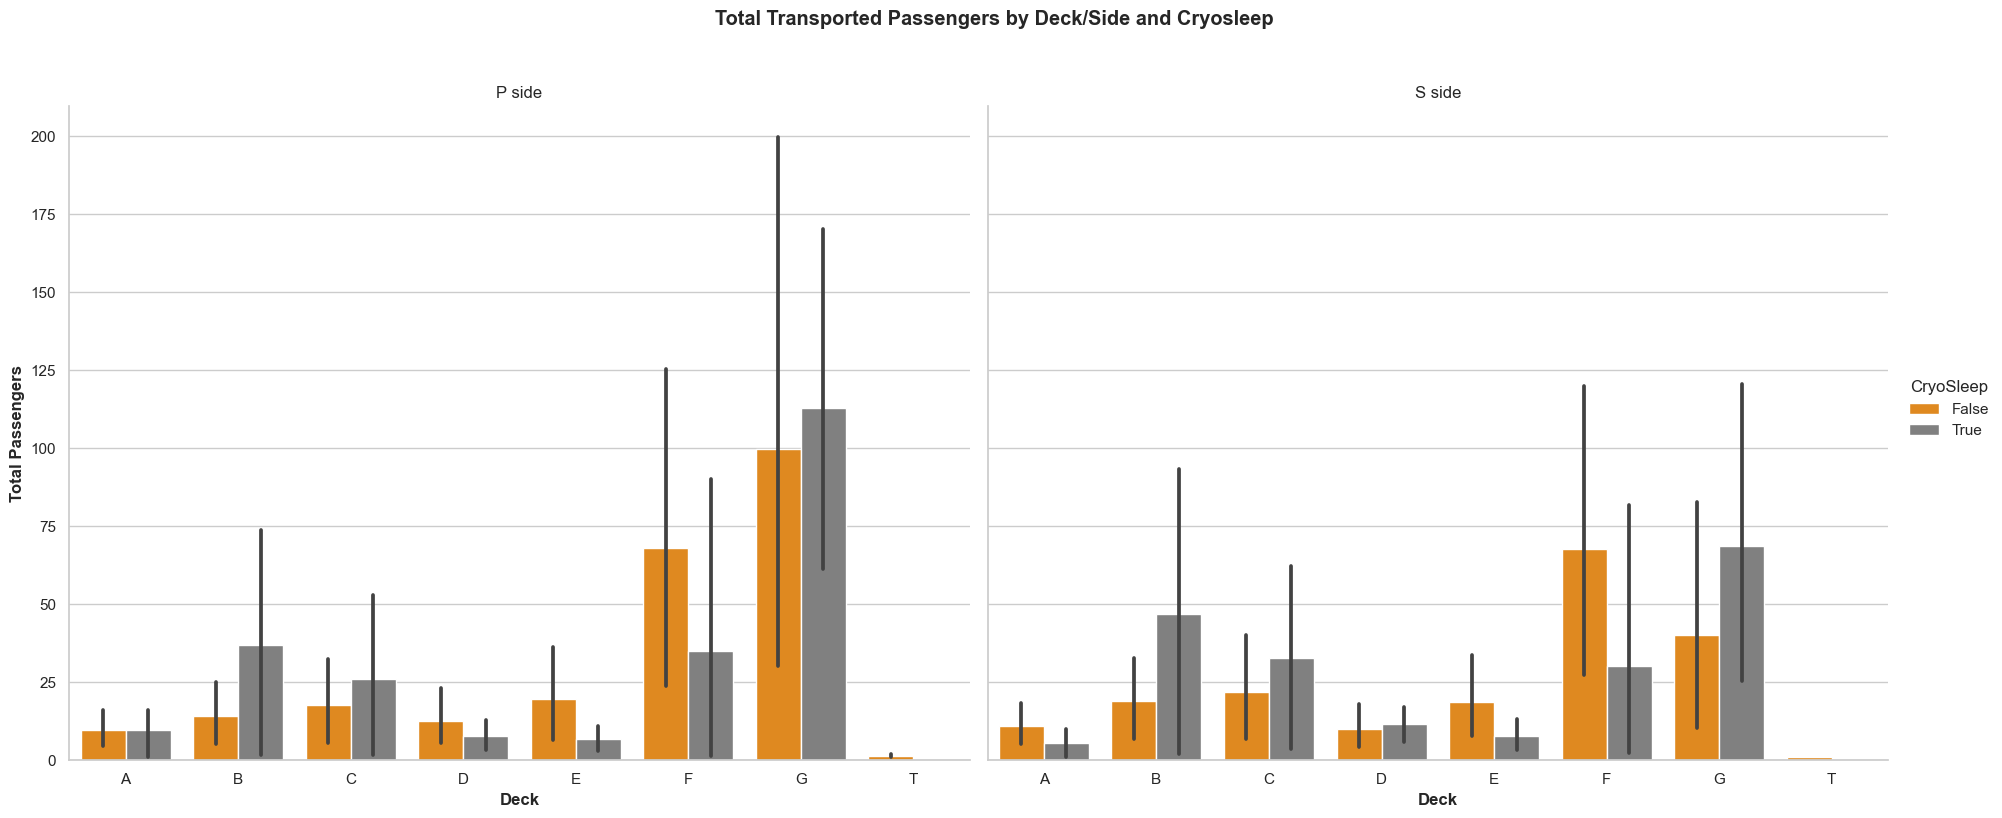

In [16]:

plt.figure(figsize=(10,10))
# Set the style of the seaborn plot to white background
sns.set(style="whitegrid")

# Create the catplot
g = sns.catplot(
    x='Deck',
    y='passenger_count',
    hue='CryoSleep',
    col='Side',
    data=space_df_agg, 
    kind='bar',
    height=8,
    aspect=1.2,
    palette=['#FF8C00', 'grey'],  # Specify the colors for each hue category
)

# Set plot labels and title
g.set_axis_labels('Deck', 'Total Passengers').set_titles("{col_name} side")
g.figure.suptitle('Total Transported Passengers by Deck/Side and Cryosleep', y=1.02, weight='bold')

# Adjust each subplot in the catplot
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), weight='bold')
    ax.set_ylabel(ax.get_ylabel(), weight='bold')
    ax.grid(axis='x', linestyle='', which='both')  # Disable vertical gridlines
    ax.grid(axis='y', linestyle='-', which='major')  # Enable horizontal gridlines

plt.subplots_adjust(top=0.9)  # Adjust the top to make space for suptitle

plt.show()

### Visualizing the Impact of Cryosleep on Passenger Transport

The visualization crafted through the code provides insightful data on the role of cryosleep in the transportation of passengers from different decks of the spaceship. Here's a summary of what the analysis reveals:

- The plot is structured with the spaceship's decks along the x-axis and the count of passengers on the y-axis. The distinction between passengers based on their cryosleep status is made using colors.
- The displayed plot portrays whether being in cryosleep affected passengers' chances of being transported, with a focus on their location within the ship.

From the visual analysis, it becomes evident that:

- Across all decks, passengers who were in cryosleep had higher transportation rates, with notable peaks on Deck F for Side P and Deck G for Side S. This pattern indicates that cryosleep might have played a crucial role in the likelihood of passengers being transported.
- Deck T exhibited a minimal number of transported passengers, and the cryosleep status did not markedly affect the outcomes here.

This visualization underscores the potential significance of cryosleep status in determining the transportation outcomes of passengers, suggesting that cryosleep could be a critical factor to consider in space transportation. The trend across decks, especially the pronounced transportation rates of passengers in cryosleep on specific decks, highlights the importance of this feature in the overall analysis of passenger safety and transportation dynamics aboard the spaceship.

### **1.7. Total Transported Passengers by Deck and HomePlanet**

<Figure size 1000x1000 with 0 Axes>

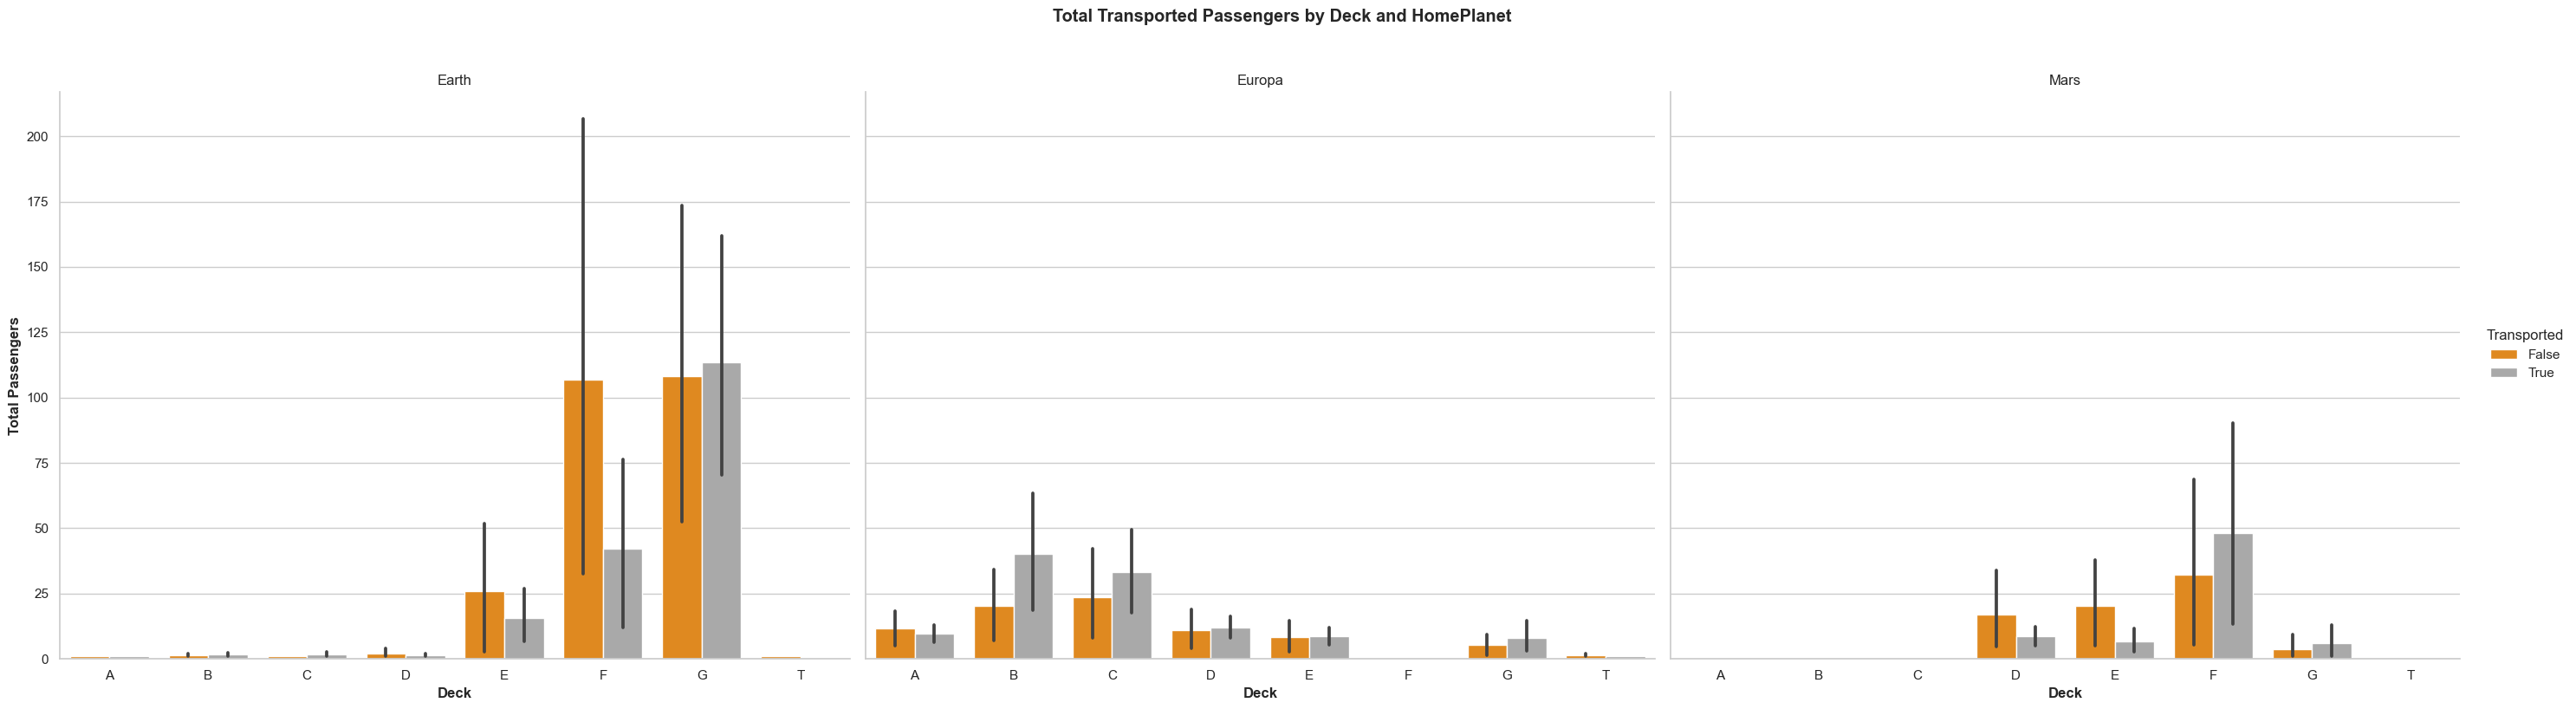

In [17]:
plt.figure(figsize=(10,10))
# Set the style of the seaborn plot to white background
sns.set(style="whitegrid")

# Create the catplot
g = sns.catplot(
    x='Deck',
    y='passenger_count',
    hue='Transported',
    col='HomePlanet',
    data=space_df_agg,  
    kind='bar',
    height=8,
    aspect=1.2,
    palette=['#FF8C00', 'darkgrey'],  # Specify the colors for each hue category
)

# Set plot labels and title
g.set_axis_labels('Deck', 'Total Passengers').set_titles("{col_name}")
g.figure.suptitle('Total Transported Passengers by Deck and HomePlanet', y=1.02, weight='bold')

# Adjust each subplot in the catplot
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), weight='bold')
    ax.set_ylabel(ax.get_ylabel(), weight='bold')
    ax.grid(axis='x', linestyle='', which='both')  # Disable vertical gridlines
    ax.grid(axis='y', linestyle='-', which='major')  # Enable horizontal gridlines

plt.subplots_adjust(top=0.9)  # Adjust the top to make space for suptitle

plt.show()

### Visualizing Passenger Transport by Deck and Home Planet

The visualization aims to show how the origin planet of the passengers could affect their chances of being transported, focusing on their deck location aboard the ship.

Here's the approach taken to create this visualization:

- A categorical plot (known as catplot) from the Seaborn library is the basis of the chart. 

This analysis reveals interesting patterns that might indicate the impact of a passenger's home planet on their journey during the spacetime anomaly.

Passengers from Earth predominantly saw higher transportation numbers from Deck G. In contrast, Europa's passengers had a more distributed presence across Decks C, D, E, and G, with notable transportation counts, while Mars's passengers mostly peaked on Deck F. The observation that Earth and Mars's passengers were frequently transported from Decks F and G, whereas Europa's passengers also had significant numbers from Decks C and E, suggests a potential link between a passenger's origin and their deck preference, which in turn might influence their transportation likelihood on the spaceship.

### **1.8. Total Transported Passengers by Deck and Destination**

<Figure size 1000x1000 with 0 Axes>

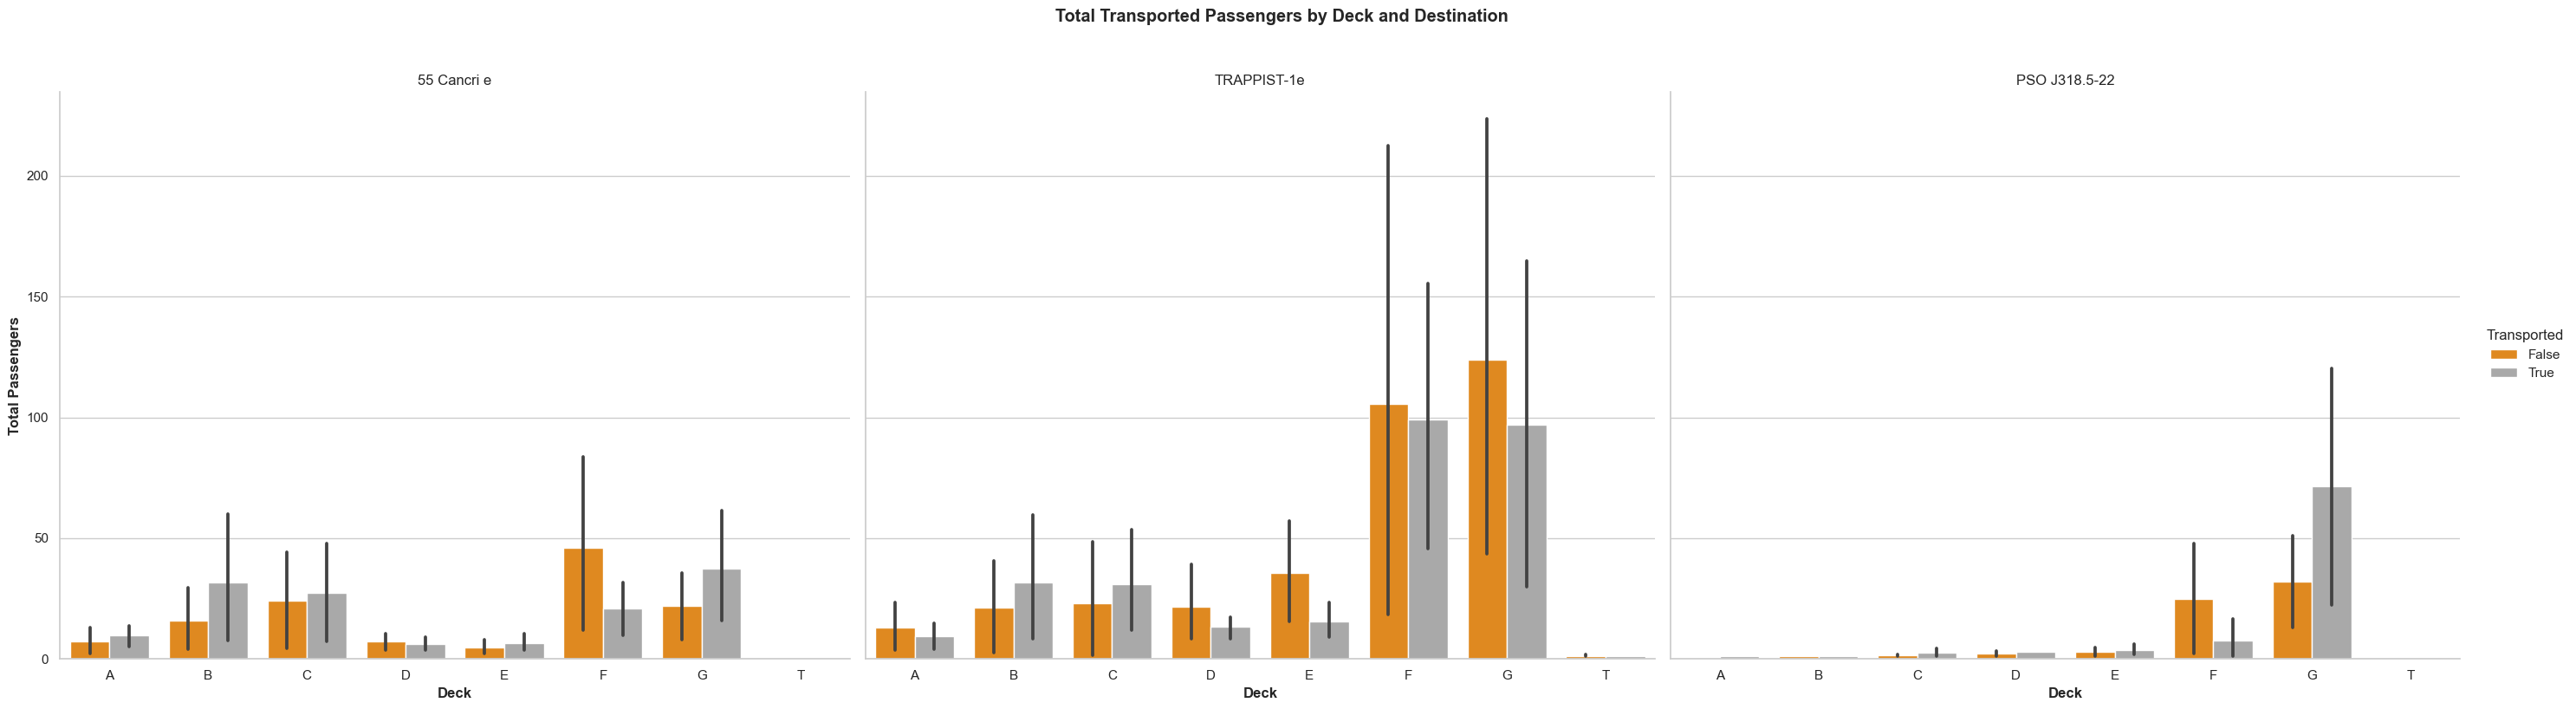

In [18]:
plt.figure(figsize=(10,10))
# Set the style of the seaborn plot to white background
sns.set(style="whitegrid")

# Create the catplot
g = sns.catplot(
    x='Deck',
    y='passenger_count',
    hue='Transported',
    col='Destination',
    data=space_df_agg, 
    kind='bar',
    height=8,
    aspect=1.2,
    palette=['#FF8C00', 'darkgrey'],  # Specify the colors for each hue category
)

# Set plot labels and title
g.set_axis_labels('Deck', 'Total Passengers').set_titles("{col_name}")
g.figure.suptitle('Total Transported Passengers by Deck and Destination', y=1.02, weight='bold')

# Adjust each subplot in the catplot
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), weight='bold')
    ax.set_ylabel(ax.get_ylabel(), weight='bold')
    ax.grid(axis='x', linestyle='', which='both')  # Disable vertical gridlines
    ax.grid(axis='y', linestyle='-', which='major')  # Enable horizontal gridlines

plt.subplots_adjust(top=0.9)  # Adjust the top to make space for suptitle

plt.show()

### Visualizing Passenger Distribution by Deck and Destination

The visualization aims to show how the origin planet of the passengers could affect their chances of being transported, focusing on their deck location aboard the ship.

Passengers from Earth saw higher transportation numbers from Deck G. In contrast, Europa's passengers had a more distributed presence across Decks C, D, E, and G, with notable transportation counts, while Mars's passengers mostly peaked on Deck F. The observation that Earth and Mars's passengers were frequently transported from Decks F and G, whereas Europa's passengers also had significant numbers from Decks C and E, suggests a potential link between a passenger's origin and their deck preference, which in turn might influence their transportation likelihood on the spaceship.

## **1.9. Average Expenses by Deck and Side**

### **Average Spa Expenses by Deck and Side**

<Figure size 1000x1000 with 0 Axes>

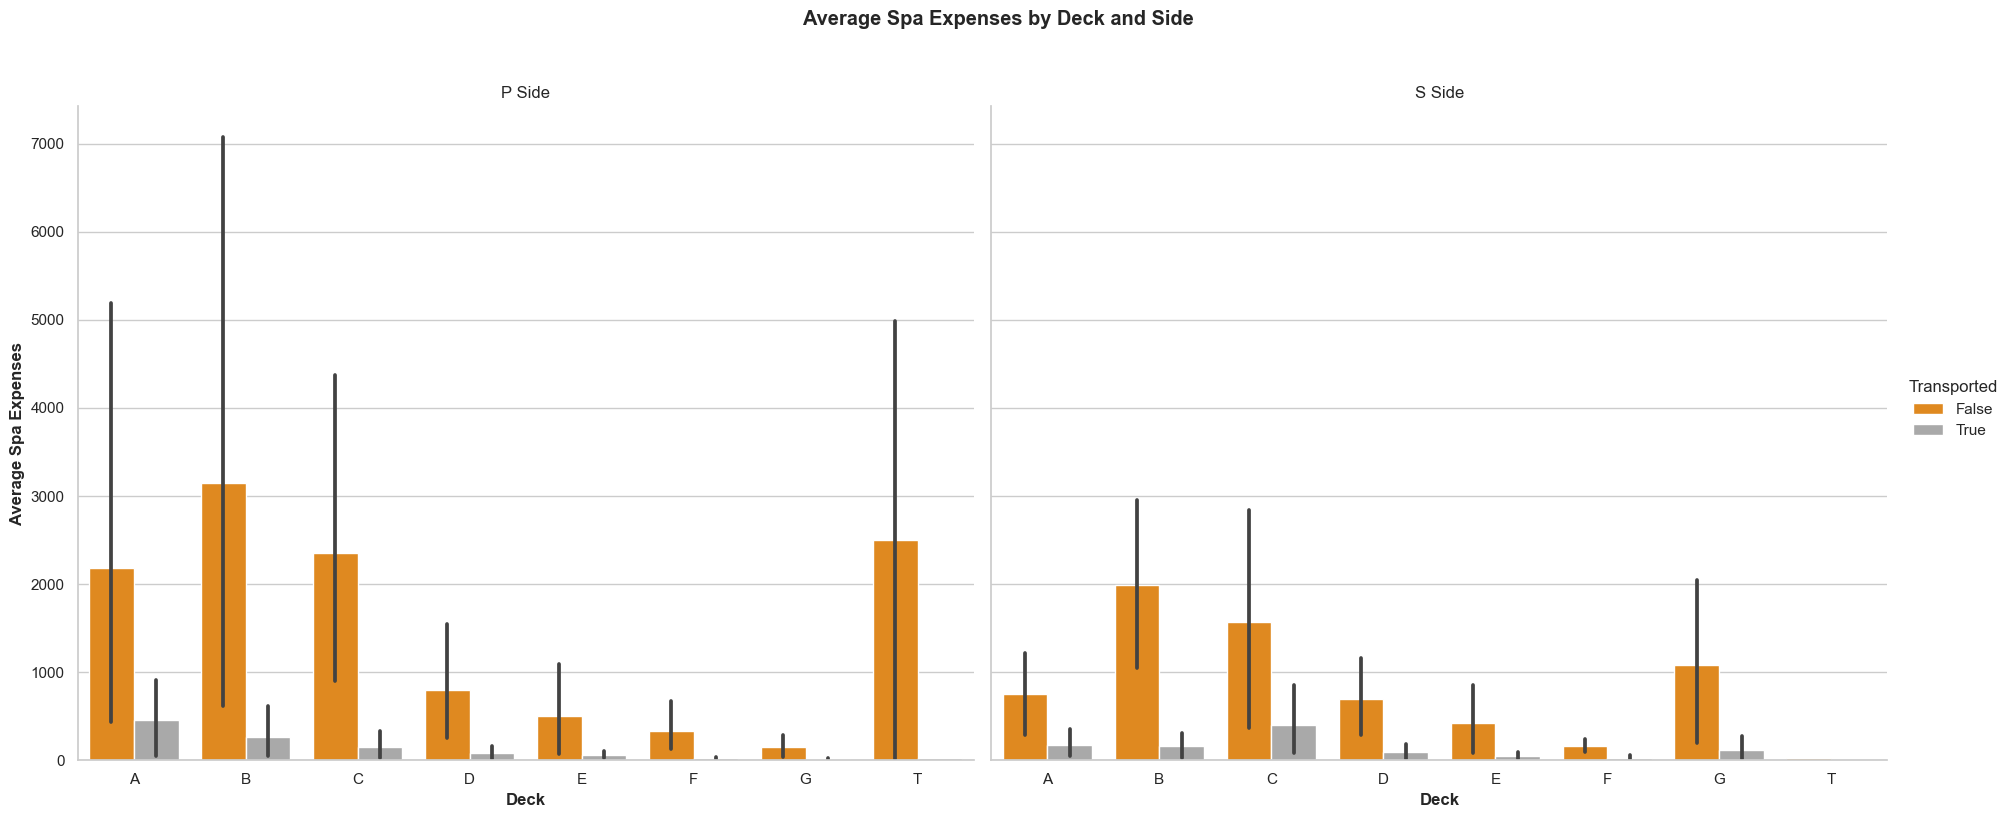

In [19]:
plt.figure(figsize=(10,10))
# Set the style of the seaborn plot to white background
sns.set(style="whitegrid")

# Create the catplot
g = sns.catplot(
    x='Deck',
    y='spa_mean',
    hue='Transported',
    col='Side',
    data=space_df_agg, 
    kind='bar',
    height=8,
    aspect=1.2,
    palette=['#FF8C00', 'darkgrey'],  # Specify the colors for each hue category
)

# Set plot labels and title
g.set_axis_labels('Deck', 'Average Spa Expenses').set_titles("{col_name} Side")
g.figure.suptitle('Average Spa Expenses by Deck and Side', y=1.02, weight='bold')

# Adjust each subplot in the catplot
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), weight='bold')
    ax.set_ylabel(ax.get_ylabel(), weight='bold')
    ax.grid(axis='x', linestyle='', which='both')  # Disable vertical gridlines
    ax.grid(axis='y', linestyle='-', which='major')  # Enable horizontal gridlines

plt.subplots_adjust(top=0.9)  # Adjust the top to make space for suptitle

plt.show()

### **Average Room Service Expenses by Deck and Side**

<Figure size 1000x1000 with 0 Axes>

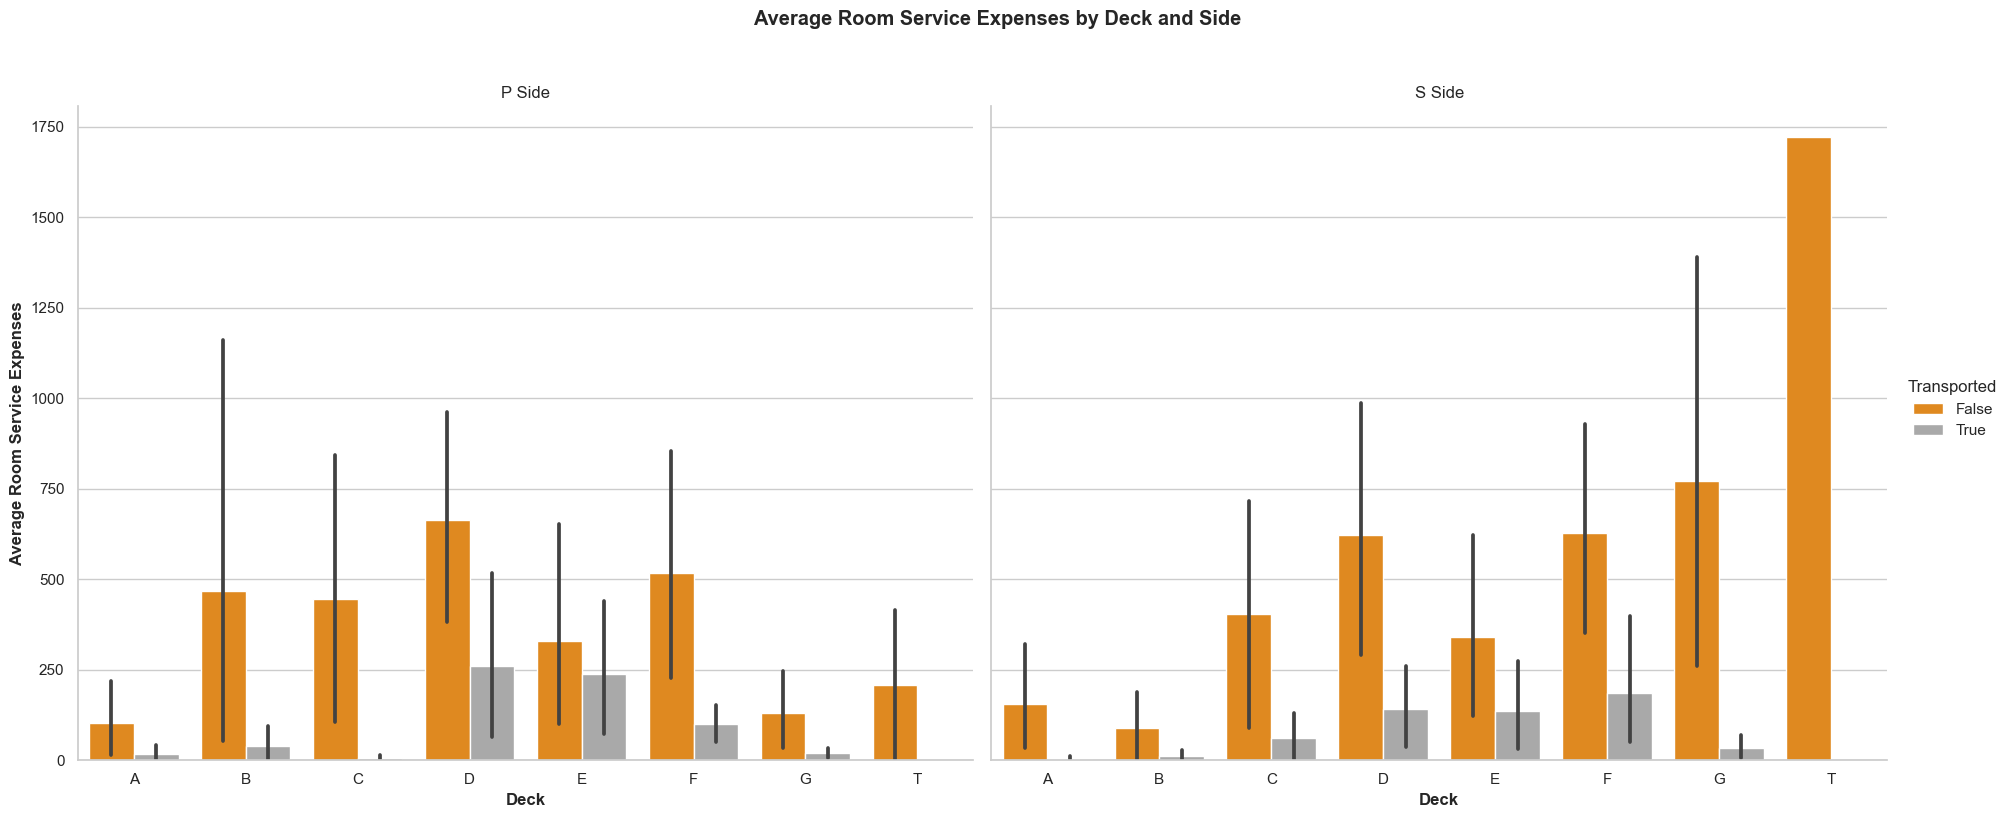

In [20]:
plt.figure(figsize=(10,10))
# Set the style of the seaborn plot to white background
sns.set(style="whitegrid")

# Create the catplot
g = sns.catplot(
    x='Deck',
    y='room_service_mean',
    hue='Transported',
    col='Side',
    data=space_df_agg,
    kind='bar',
    height=8,
    aspect=1.2,
    palette=['#FF8C00', 'darkgrey'],  # Specify the colors for each hue category
)

# Set plot labels and title
g.set_axis_labels('Deck', 'Average Room Service Expenses').set_titles("{col_name} Side")
g.figure.suptitle('Average Room Service Expenses by Deck and Side', y=1.02, weight='bold')

# Adjust each subplot in the catplot
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), weight='bold')
    ax.set_ylabel(ax.get_ylabel(), weight='bold')
    ax.grid(axis='x', linestyle='', which='both')  # Disable vertical gridlines
    ax.grid(axis='y', linestyle='-', which='major')  # Enable horizontal gridlines

plt.subplots_adjust(top=0.9)  # Adjust the top to make space for suptitle

plt.show()

### **Average Food Court Expenses by Deck and Side**

<Figure size 1000x1000 with 0 Axes>

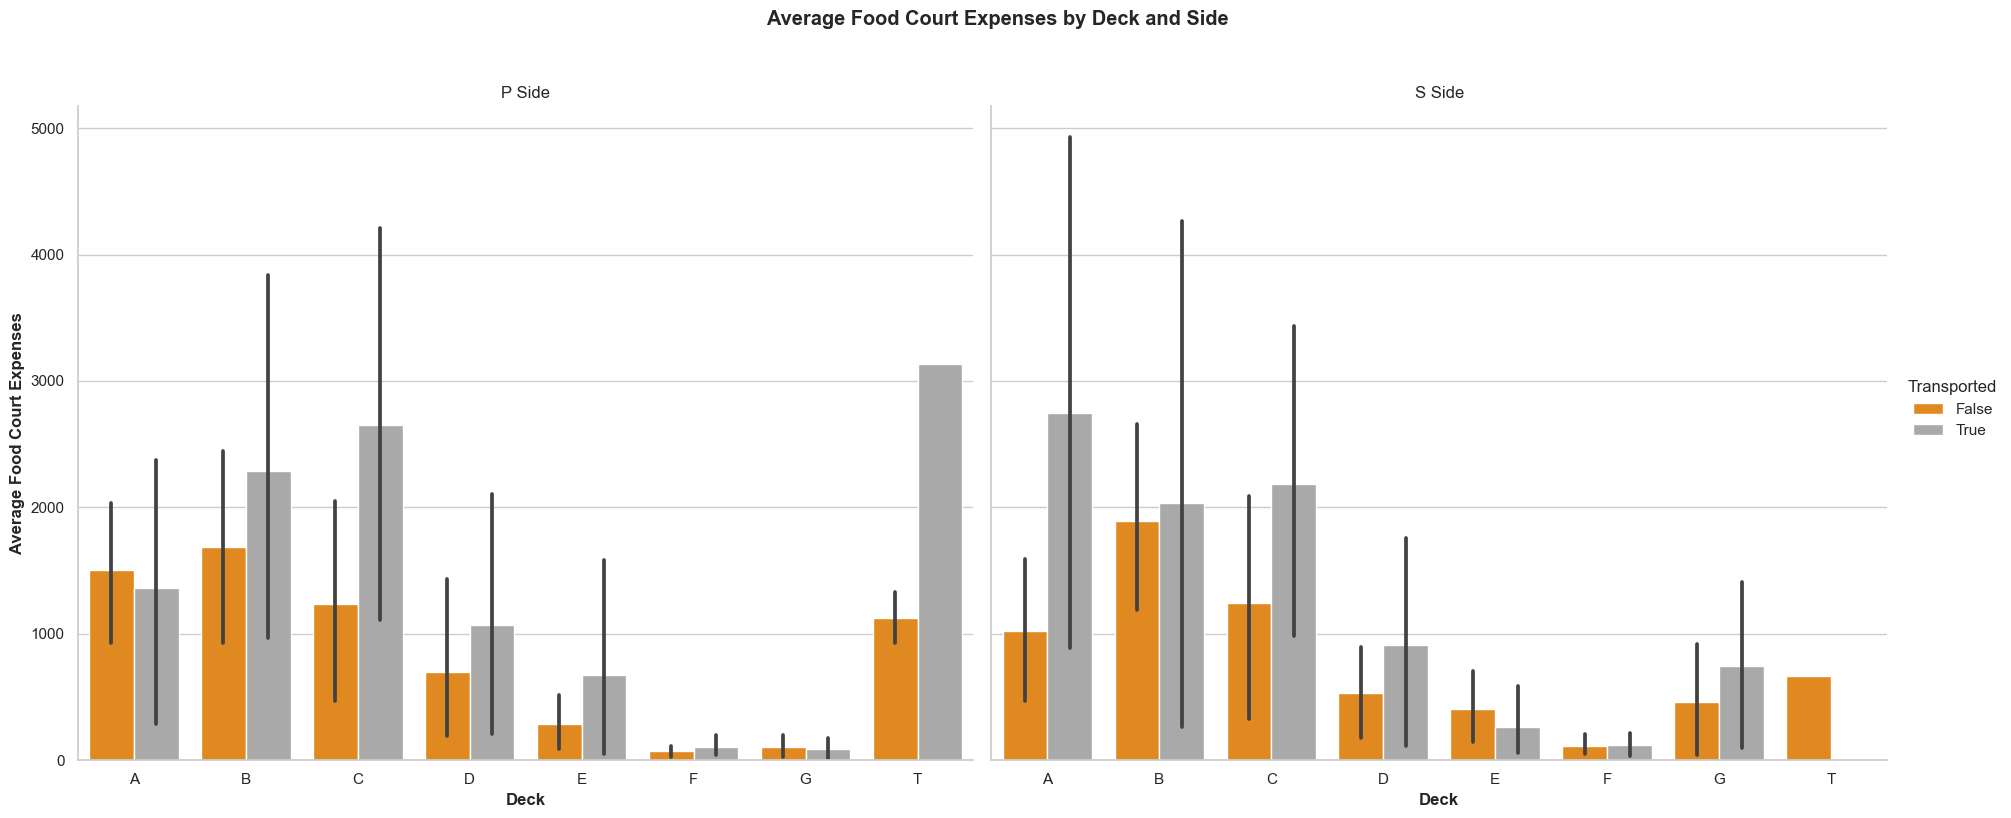

In [21]:
plt.figure(figsize=(10,10))
# Set the style of the seaborn plot to white background
sns.set(style="whitegrid")

# Create the catplot
g = sns.catplot(
    x='Deck',
    y='food_court_mean',
    hue='Transported',
    col='Side',
    data=space_df_agg, 
    kind='bar',
    height=8,
    aspect=1.2,
    palette=['#FF8C00', 'darkgrey'],  # Specify the colors for each hue category
)

# Set plot labels and title
g.set_axis_labels('Deck', 'Average Food Court Expenses').set_titles("{col_name} Side")
g.figure.suptitle('Average Food Court Expenses by Deck and Side', y=1.02, weight='bold')

# Adjust each subplot in the catplot
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), weight='bold')
    ax.set_ylabel(ax.get_ylabel(), weight='bold')
    ax.grid(axis='x', linestyle='', which='both')  # Disable vertical gridlines
    ax.grid(axis='y', linestyle='-', which='major')  # Enable horizontal gridlines

plt.subplots_adjust(top=0.9)  # Adjust the top to make space for suptitle

plt.show()

### **Average VR Deck Expenses by Deck and Side**

<Figure size 1000x1000 with 0 Axes>

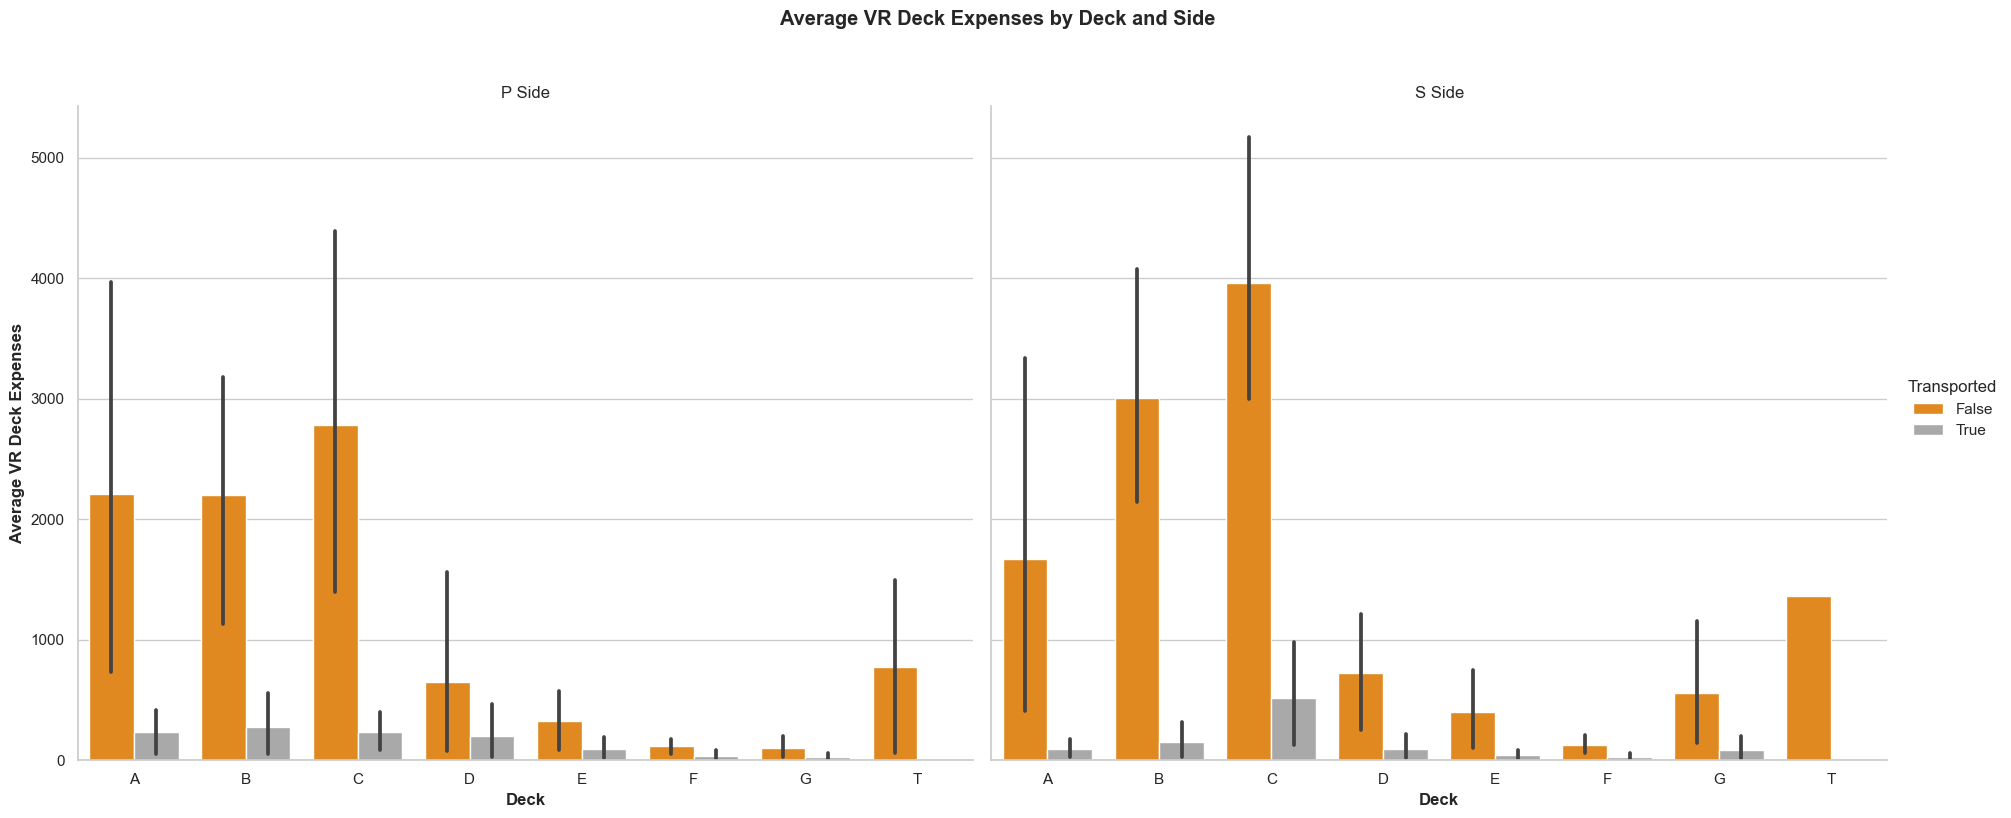

In [22]:
plt.figure(figsize=(10,10))
# Set the style of the seaborn plot to white background
sns.set(style="whitegrid")

# Create the catplot
g = sns.catplot(
    x='Deck',
    y='vr_deck_mean',
    hue='Transported',
    col='Side',
    data=space_df_agg, 
    kind='bar',
    height=8,
    aspect=1.2,
    palette=['#FF8C00', 'darkgrey'],  # Specify the colors for each hue category
)

# Set plot labels and title
g.set_axis_labels('Deck', 'Average VR Deck Expenses').set_titles("{col_name} Side")
g.figure.suptitle('Average VR Deck Expenses by Deck and Side', y=1.02, weight='bold')

# Adjust each subplot in the catplot
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), weight='bold')
    ax.set_ylabel(ax.get_ylabel(), weight='bold')
    ax.grid(axis='x', linestyle='', which='both')  # Disable vertical gridlines
    ax.grid(axis='y', linestyle='-', which='major')  # Enable horizontal gridlines

plt.subplots_adjust(top=0.9)  # Adjust the top to make space for suptitle

plt.show()

### **Average Shopping Mall Expenses by Deck and Side**

<Figure size 1000x1000 with 0 Axes>

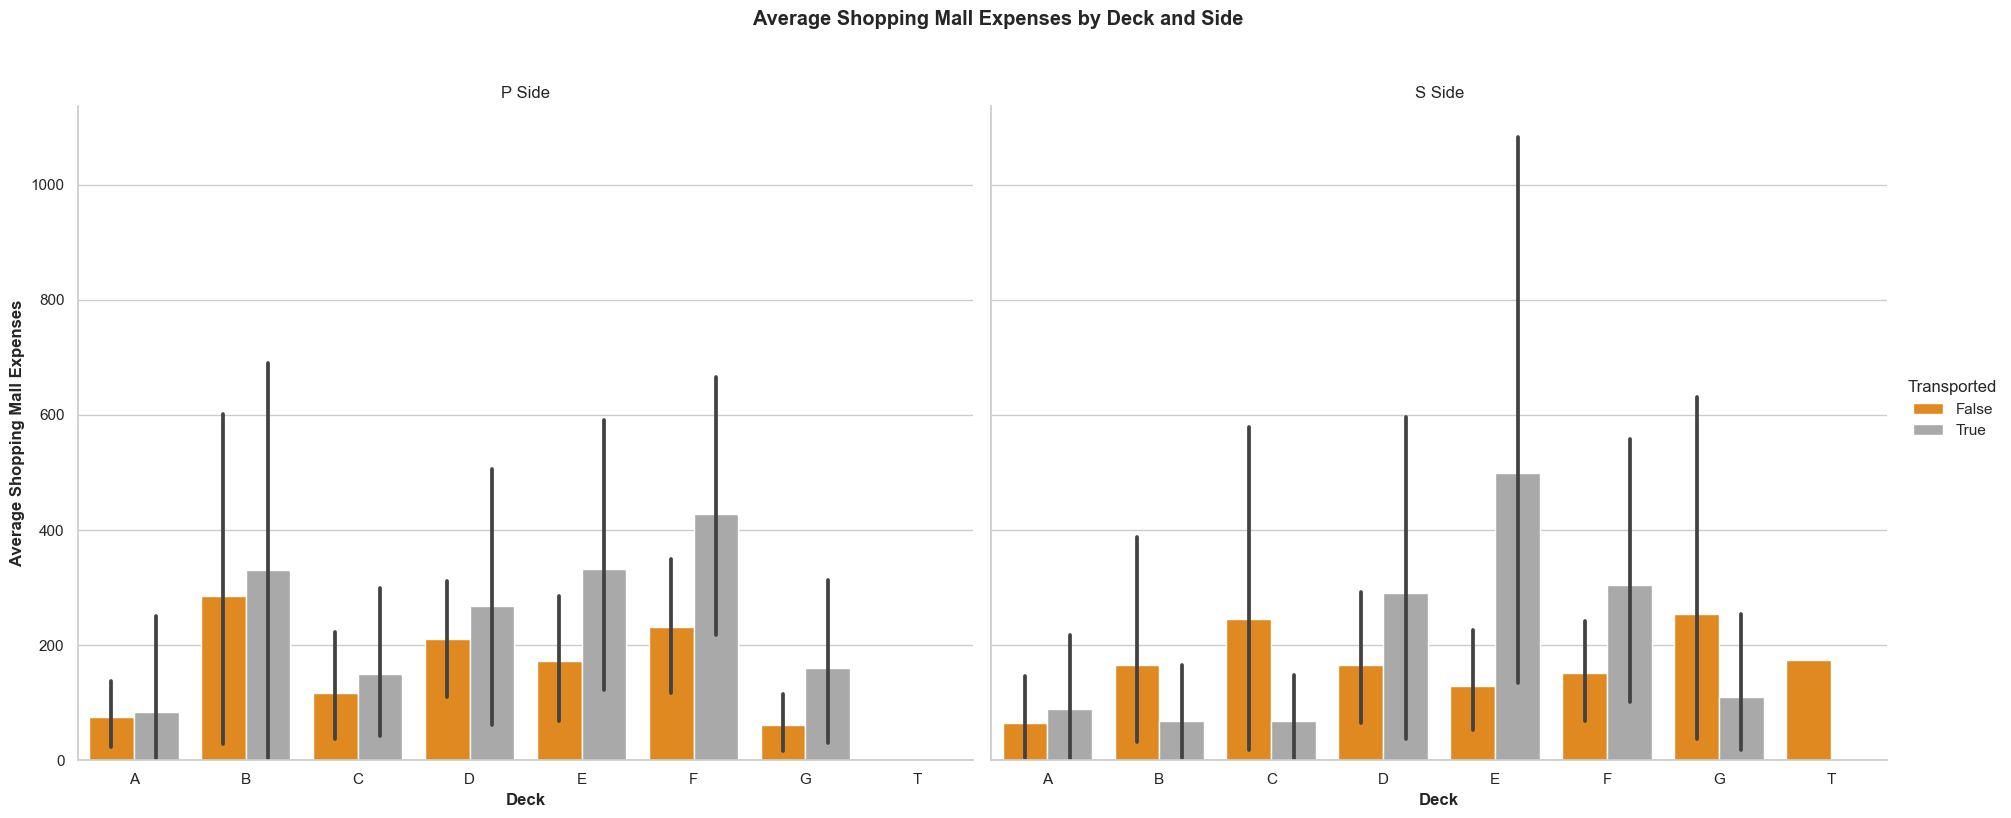

In [23]:
plt.figure(figsize=(10,10))
# Set the style of the seaborn plot to white background
sns.set(style="whitegrid")

# Create the catplot
g = sns.catplot(
    x='Deck',
    y='shopping_mall_mean',
    hue='Transported',
    col='Side',
    data=space_df_agg,  
    kind='bar',
    height=8,
    aspect=1.2,
    palette=['#FF8C00', 'darkgrey'],  # Specify the colors for each hue category
)

# Set plot labels and title
g.set_axis_labels('Deck', 'Average Shopping Mall Expenses').set_titles("{col_name} Side")
g.figure.suptitle('Average Shopping Mall Expenses by Deck and Side', y=1.02, weight='bold')

# Adjust each subplot in the catplot
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), weight='bold')
    ax.set_ylabel(ax.get_ylabel(), weight='bold')
    ax.grid(axis='x', linestyle='', which='both')  # Disable vertical gridlines
    ax.grid(axis='y', linestyle='-', which='major')  # Enable horizontal gridlines

plt.subplots_adjust(top=0.9)  # Adjust the top to make space for suptitle

plt.show()

#### Summary:


1. *VR Deck Bill*: There's a notable association between higher spending on the VR deck and the likelihood of being transported for passengers on Deck C (Side P) and Deck G (on both sides). This trend suggests that engagement with the VR deck could influence transportation outcomes.

2. *Room Service Bill*: On Side P, particularly on Deck G, transported passengers exhibited higher average room service bills, indicating a possible link between room service usage and the chance of being transported.

3. *Food Court Bill*: For Side P, transported passengers on Decks C and E demonstrated higher spending at the food court. Conversely, on Side S, Deck C's transported passengers were the top spenders, suggesting variations in food court spending patterns between sides.

4. *Shopping Mall Bill*: Transported passengers on Deck E (Side P) and Deck G (Side S) spent more on average in the shopping mall, pointing to a potential connection between shopping activity and being transported.

The data indicates a trend where passengers on Side P who actively used ship amenities like the VR deck, room service, and the shopping mall, and who incurred higher expenses in these areas, had a higher likelihood of being transported. Although this pattern is less pronounced on Side S, it is observable in the context of VR deck and shopping mall expenditures. Deck G consistently shows up as having higher average bills, suggesting its passengers' greater engagement with onboard amenities.

Furthermore, the port side of the spaceship (Side P) acommodate more passengers compared to the starboard side (Side S), potentially due to a larger number of passengers in cryosleep on Side P, as revealed in the transportation and cryosleep analysis. This discrepancy might be explained by the capacity for cabins to accommodate more passengers in cryosleep, suggesting that cryosleep status could also play a role in the observed transportation patterns.

### **2. Correlation Heatmap**

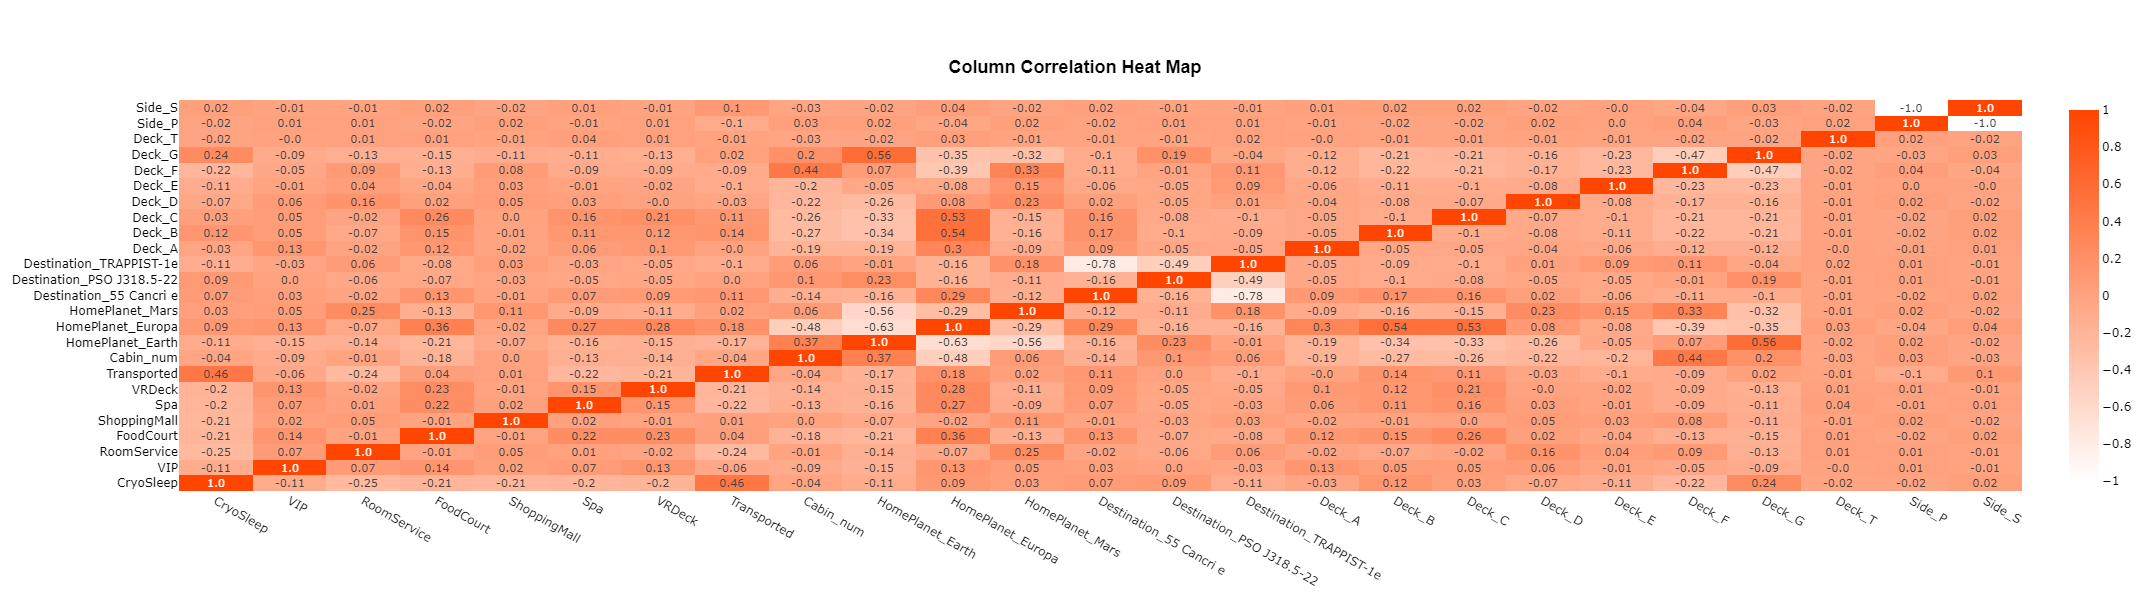

In [24]:
df_droped = space_df_cleaned.drop(columns=['PassengerId', 'Name', 'Age'])
object_column = df_droped.select_dtypes(include='object').columns.to_list()
space_df_clean2 = pd.get_dummies(df_droped, columns=object_column)

corr = space_df_clean2.corr()

# Define a color scale from white (weakest) to orange (strongest)
color_scale = [(0, 'white'), (1, '#FF4500')]

# Convert the correlation matrix to a 2D list for text annotations
text = corr.round(2).astype(str).values.tolist()

# Create the heatmap with text annotations
figure = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns.tolist(),
    y=corr.index.tolist(),
    colorscale=color_scale,
    text=text,
    texttemplate="%{text}",
    showscale=True
))

# Customize the layout
figure.update_layout(
    title={'text': '<b>Column Correlation Heat Map<b>',
            'y':0.90,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(family="Arial, sans-serif", size=18, color='black'),
            },
    width=800,
    height=600,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color="black")
)

# Customize the color axis ticks
figure.update_coloraxes(colorbar_tickfont=dict(color='black'))

figure.show()


The analysis of the correlation matrix reveals significant insights into the factors influencing passengers' likelihood of being transported:

1. *CryoSleep*: There's a strong positive correlation between passengers in cryosleep and their chances of being transported. This suggests that being in cryosleep significantly increases the likelihood of transportation.

2. *VIP Status and Room Service*: Both VIP status and spending on room service exhibit negative correlations with being transported. This indicates that VIP passengers and those who spend more on room service are less likely to be transported.

3. *Food Court Spending*: A weak positive correlation is observed with spending at the food court, implying that higher expenditure in this area slightly increases the chance of being transported.

4. *Home Planets and Decks*: The correlation varies by passengers' home planets and their deck locations. Passengers from Europa and those staying on Deck C show positive correlations with being transported, suggesting these groups are more likely to experience transportation. Conversely, passengers from Earth and those on Deck E have negative correlations, indicating a lower likelihood of being transported from these categories.

5. *Ship Side*: The side of the ship also influences transportation outcomes. Being on Side S (starboard side) is positively correlated with being transported, unlike Side P (port side), highlighting the role of ship orientation in the transportation phenomenon.

## **3. Training the Model**

In [25]:
# Split
X = space_df_clean2.drop('Transported', axis=1)
y = space_df_clean2['Transported']

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=123, shuffle=True)

# scaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [26]:
def base_model(x_train_scaled, y_train, x_val_scaled, y_val):

  epochs = 50 # sets the amount of iterations for each model

  loss = 'binary_crossentropy' # quantifies the difference between the predicted outputs of the 
                               # model and the actual target values. The optimizer uses this loss 
                               # value to adjust the model parameters with the aim of minimizing the loss, 
                               # thereby improving the model's predictions.
                
  metrics = ['accuracy', 'Precision', 'Recall'] # setting up variables for models
  batch_size = 32 # how the data is partioned when calculating model predictions for memory efficiency and run speed


  # Logistic regression
  def logistic():

    def model():
      model = Sequential(layers=[
          layers.Input(shape=(x_train_scaled.shape[1]), dtype='float32'), # inputing layers based on number of features
          layers.Dense(1, activation='sigmoid')
          # sets layer of model to 1 where it calcualtes the weight of coefficients that is used
          # to calculate the probability that one input would result in a specific one output
          # probabilities < 0.5 is considered 0 and > 0.5 is considered 1
          # the probability is calculated using the sigmoid function: f(x) = 1 / (1 + e^(-x)) where x is the input
          # its a regression model since tghe weights of coefficient is used as the coefficient of the regression equation
          # and the bias term representing the intercept of the regression equation
          ],
        name ='logistic_regression')
      return model

    model = model()
    model.compile(
        optimizer=tf.keras.optimizers.legacy.Adam(), 
        loss= loss,
        metrics=metrics
        # goes through multiple variations of the weight of coefficients used by the layers.Dense function earlier
        # specifically goes through variations to reduce loss
        # loss can be thought similarly to the accuracy of the model but instead of how correct it is,
        # its the value of how incorrect the current iteration model weights are
        )

    print('Training Logistic regression model')

    history = model.fit(
        x_train_scaled,
        y_train,
        validation_data=(x_val_scaled, y_val),
        epochs=epochs,  
        batch_size=batch_size # saves the parameters of accuracy, loss, and weights per epoch
    )
    print('Logistic regression model completed')
    model.save('logistic_regression.h5') # saves model parameters for future application
    # Extract and print model parameters for logistic regression
    parameters = model.get_weights()
    print("Model Parameters for Logistic Regression:", parameters)

    # Since logistic regression doesn't need a complex representation, we focus on parameters
    print("Weights shape:", parameters[0].shape)
    print("Bias shape:", parameters[1].shape)
    return history, model.name, model # prints the current epoch's history previously defined

  def linear_regression():
  # more or less the same as logisitic regression but with one exception
    def model():
      model = Sequential(layers=[
          layers.Input(shape=(x_train_scaled.shape[1]), dtype='float32'),
          layers.Dense(1, activation='linear')
          # the difference being that the activation function is linear so that the input and output of the model
          # is not transformed: f(x) = x
          ],
        name ='linear_regression')
      return model

    model = model()
    model.compile(
        optimizer=tf.keras.optimizers.legacy.Adam(),
        loss= loss,
        metrics=metrics
        )

    print('Training linear regression model')
    history = model.fit(
        x_train_scaled,
        y_train,
        validation_data=(x_val_scaled, y_val),
        epochs=epochs,
        batch_size=batch_size
    )

    print('Linear regression model completed')
    model.save('linear_regression.h5') 
    # Extract and print model parameters for linear regression
    parameters = model.get_weights()
    print("Model Parameters for Linear Regression:", parameters)

    # Printing the shape of the weights and bias for understanding
    print("Weights shape:", parameters[0].shape)
    print("Bias shape:", parameters[1].shape)
    return history, model.name, model

  def neural_network():
# again this is the same setup as the previous two models with the difference being in layers.Dense
    def model():
      model = Sequential(layers=[
          layers.Input(shape=(x_train_scaled.shape[1]), dtype='float32'),
          layers.Dense(256, activation='relu', name='dense1'),
          layers.Dense(512, activation='relu', name='dense2'),
          layers.Dense(1024, activation='relu', name='dense3'),
          layers.Dense(1, activation='sigmoid', name='output')
      ],
    # setting up 4 layers in network:
    # First layer has 256 neurons where the activation function is rectified linear unit: f(x) = max(0,x)
    # Second layer has 512 neurons with the same activation function
    # Third layer has 1024 neurons with the same activation function
    # These first three layers is to progressively extract and refine the features we input
    # The final layer utilizes logistic regression approach with one neuron or layer to compute the probability
    # of outcome (0 or 1) based on the refined features
                         
                         
    # This approach is similar to how the scikit library's sklearn.neural_network.MLPRegressor works
    # in the sense that both models allows the creation of multiple layers and a final regression model for 
    # binary output. The specific parameters that are similar is setting the first three layers, the activation function
    # being relu, and the solver being adam (this is the optimizer used below).
      name='neural_network'
      )
      return model

    model = model()
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss= loss,
        metrics=metrics
        )
    print('Training Neuronal Network model')
    history = model.fit(
        x_train_scaled,
        y_train,
        validation_data=(x_val_scaled, y_val),
        epochs=epochs,
        batch_size=batch_size,
       
    )
    print('Neuronal Network model completed')
    model.save('neural_network.h5')
    # For Neural Network, we can print the summary and the first layer's weights as an example
    model.summary()

    # Optionally, if you want to show weights of the first layer as an example
    parameters = model.get_weights()[0]  # Just as an example, getting the first layer weights
    print("First layer weights shape:", parameters.shape)
    return history, model.name, model


  def decision_tree():
    def model():
        # Params for GridSearchCV
        param_grid = {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 10, 20],
            'min_samples_leaf': [1, 4, 10],
            'criterion': ['gini', 'entropy']
        }

        # Start the Decision Tree Classifier for GridSearchCV
        dt_model_for_grid_search = DecisionTreeClassifier(random_state=42)

        # Initialize GridSearchCV
        grid_search = GridSearchCV(estimator=dt_model_for_grid_search, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0, scoring='accuracy')

        # Fit GridSearchCV to get top parameters
        # Runs through every iteration of parameters range
        grid_search.fit(x_train_scaled, y_train)
        # saves the best params after going through each parameter
        best_params = grid_search.best_params_

        # Best parameters to create a new DecisionTreeClassifier
        best_model = DecisionTreeClassifier(**best_params, random_state=42)
        return best_model

    # Fit the model using the top parameters from GridSearchCV
    model = model()
    model.fit(x_train_scaled, y_train)
    
    # accuracy on the validation set
    accuracy = model.score(x_val_scaled, y_val)

    history = {'accuracy': [accuracy], 'val_accuracy': [accuracy]}
    
        # Visualize the trained decision tree
    plt.figure(figsize=(20,10))
    plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Transported', 'Transported'])
    plt.savefig('decision_tree_visualization.png', format='png', bbox_inches='tight')
    plt.show()

    return history, 'decision_tree', model



  def train():

    training_result = {}

    training_metric = [
        'accuracy', 'val_accuracy'
          ]

    models = [logistic(), linear_regression(), neural_network(), decision_tree()]
    # runs through each model given the same input features and transported target variable
    for mod in models:
        model_result, model_name, _ = mod  
        # Plot training result
        if model_name != 'decision_tree': 
            result = pd.DataFrame(model_result.history)
            plot_line(result[training_metric], model_name)
            max_training_accuracy = round(result['accuracy'].max(), 3)
            # if the best model is not decision tree, save the model and its parameters
        else:  #  decision tree model
            max_training_accuracy = round(model_result['accuracy'][0], 3)
            # save the best parameter for decision tree if its the best model out of the four

        training_result[model_name] = max_training_accuracy

    # plots the results for comparison
    figure = px.bar(x=training_result.keys(),
                 y=training_result.values())

    figure = px.bar(x=training_result.keys(),
                 y=training_result.values())

    figure.update_layout(title=f'Best model',
                  xaxis_title='Epochs',
                  yaxis_title='Performance',
                  width=800,
                  height=600,
                  plot_bgcolor='white',
                  paper_bgcolor='white',
                  font=dict(color="black" ))
    figure.update_traces(marker=dict(color='#FF4500'))
    figure.show()


  return train()


Training Logistic regression model
Epoch 1/50


204/204 [==============================] - 2s 3ms/step - loss: 0.8909 - accuracy: 0.4493 - precision: 0.4550 - recall: 0.4898 - val_loss: 0.7868 - val_accuracy: 0.4913 - val_precision: 0.4996 - val_recall: 0.5032
Epoch 2/50
204/204 [==============================] - 0s 2ms/step - loss: 0.7186 - accuracy: 0.5594 - precision: 0.5633 - recall: 0.5448 - val_loss: 0.6595 - val_accuracy: 0.6155 - val_precision: 0.6338 - val_recall: 0.5765
Epoch 3/50
204/204 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.6592 - precision: 0.6711 - recall: 0.6297 - val_loss: 0.5870 - val_accuracy: 0.7052 - val_precision: 0.7197 - val_recall: 0.6878
Epoch 4/50
204/204 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.7121 - precision: 0.7244 - recall: 0.6884 - val_loss: 0.5420 - val_accuracy: 0.7479 - val_precision: 0.7530 - val_recall: 0.7502
Epoch 5/50
204/204 [==============================] - 0s 2ms/step 

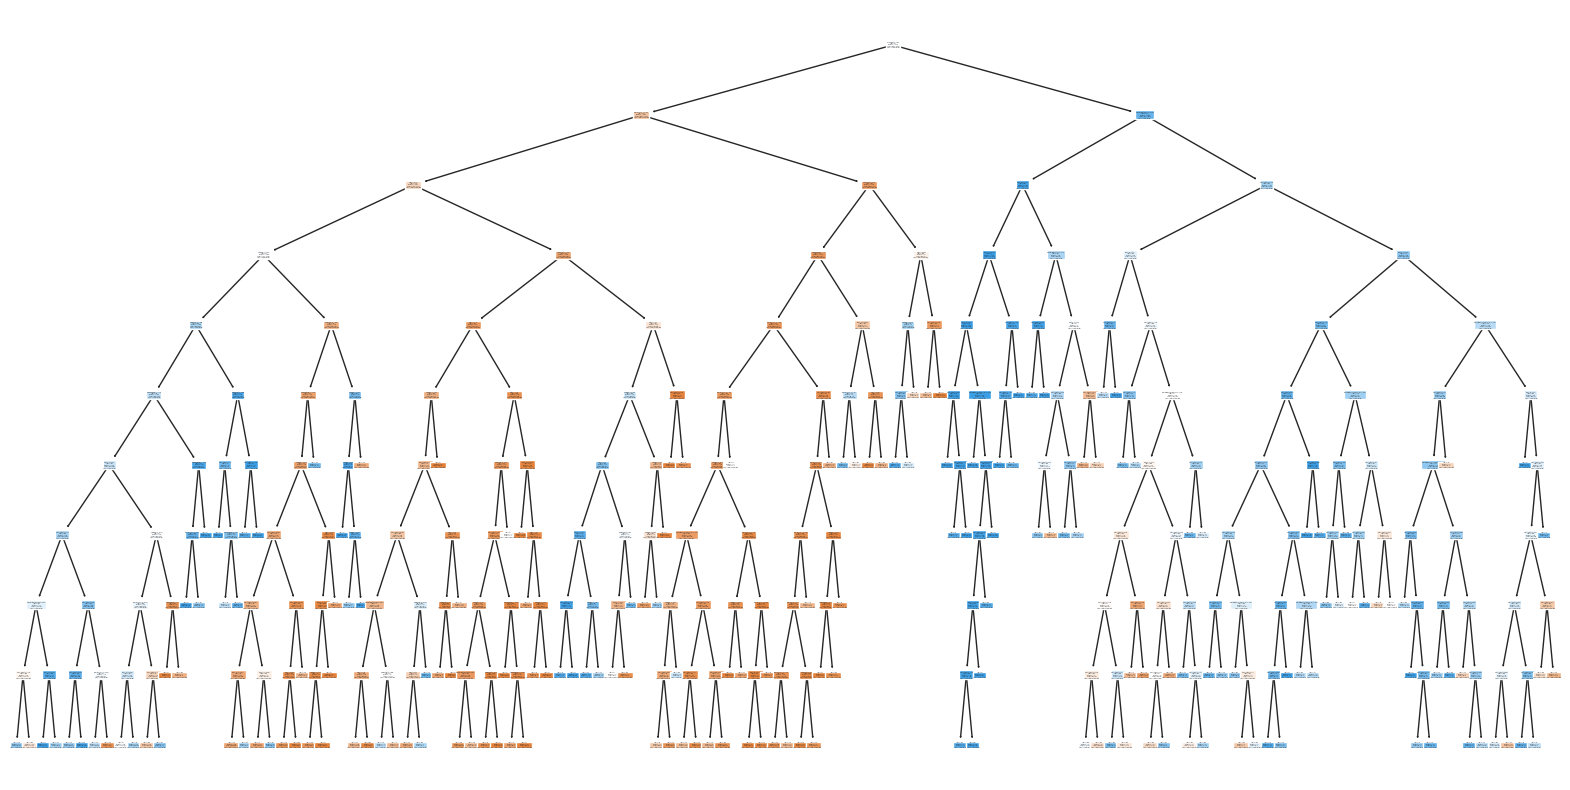

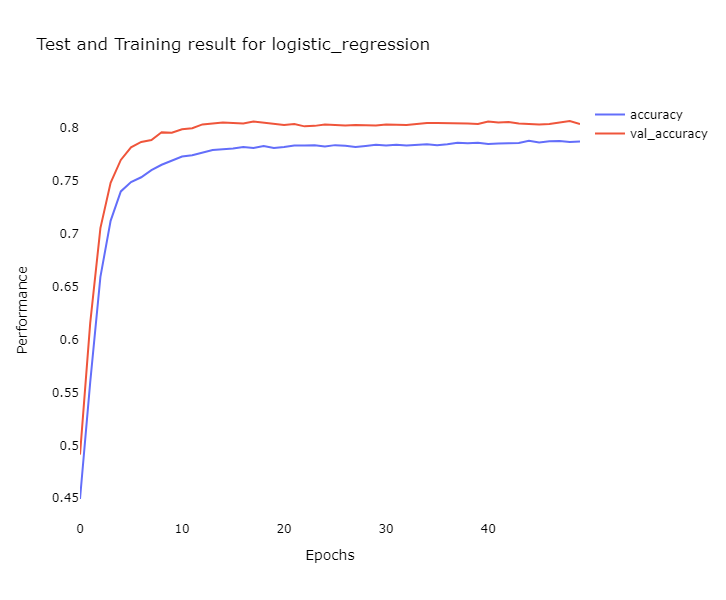

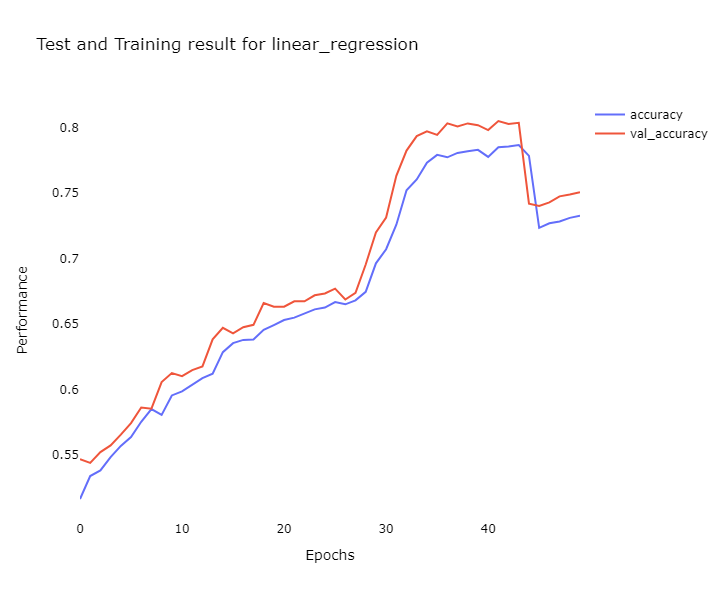

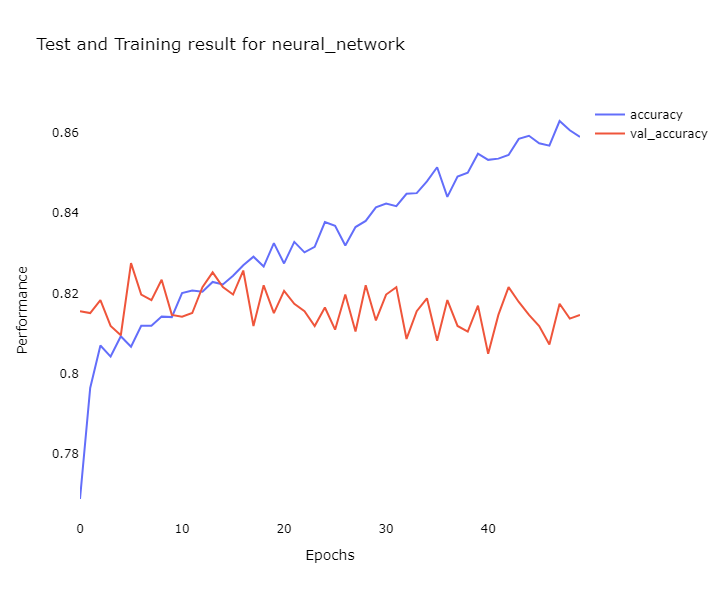

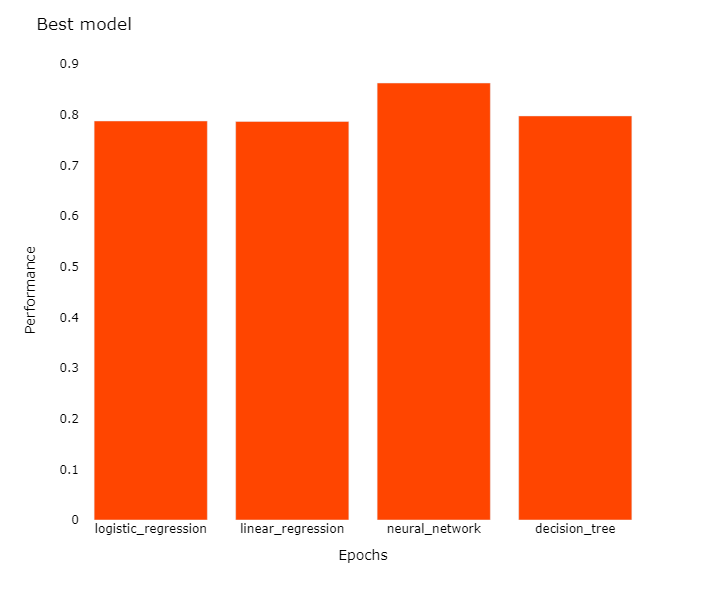

In [27]:
base_model(x_train_scaled, y_train, x_val_scaled, y_val)

## **4. Models Results Insights**

### **4.1. Logistic Regression Model Insights**

Logistic Regression is utilized when the research is concerned with the occurrence of an event rather than the timing of the event. It is especially suitable for models that involve decision-making, such as binary choices (Boateng & Abaye, 2019). Our logistic model prioritize variables with the greatest significant impact on the probability of being classified as 'Transported' based on the logistic regression model parameters. The model shows that specific activities and decisions of passengers have a significant impact on their travel outcomes.


### Most Relevant Variables and Their Interpretations

- *CryoSleep (0.636459947):* Being in cryosleep indicates a substantial correlation between being transported and cryosleep.

- *RoomService (-1.04412234):* Higher expenditure on room service is associated with a reduced probability of getting 'Transported'. This could indicate that passengers engaging less in cryosleep and more in services like room service are more likely to reach their destination and not being transported to the unknown.

- *FoodCourt (0.741615474):* Higher expenditure in the food court is linked to an increased probability of being 'Transported'. This might reflect negatively on the passenger's experience based on a higher socio-economic status.

- *Spa (-2.24207067) and VRDeck (-2.00132751):* Given that these variables have the biggest negative coefficients, it is likely that using luxury services more frequently will greatly reduce the likelihood of getting "Transported." This may emphasize an intricate connection between the use of luxury services and the results of travel.


### Equation Representation

The logistic regression model can be represented as follows, where \(X_1, X_2, ..., X_{24}\) are the standardized features, \(w_1, w_2, ..., w_{24}\) are the corresponding weights, and \(b\) is the bias term:

\[
logit(p) = w_1X_1 + w_2X_2 + ... + w_{24}X_{24} + b
\]

To convert the log-odds \(logit(p)\) to the probability \(p\) of being 'Transported', we use the logistic function:

\[
p = \frac{1}{1 + e^{-(logit(p))}}
\]

### Key Insights

- *CryoSleep* emerges as a critical determinant for increasing the probability of unsuccessful travel or getting transported, underscoring the potential negative effects of cryosleep during space travel.

- *Spending patterns* on services (Room Service, Food Court, Spa, VRDeck) have a varied association with travel success, suggesting for further investigation on the impact of passengers' expenditures. A practical future approach could be to aggregate all these into a single variable.

### **4.2. Linear Regression Model Insights**

The linear regression model quantitatively assesses the impact of each variable on the target variable (IBM, 2024), which in this case may be a continuous outcome associated with space travel, such as a score or amount. In this section, we examine and explore the implications of the variables with the highest significant weights (coefficients) in the model.

### Most Relevant Variables and Their Interpretations

- *CryoSleep (0.07745828):* A slight positive correlation with the target variable indicates that individuals in cryosleep may have a slightly greater score or amount in the measured outcome. This may suggest a little inclination for individuals in cryosleep.

- *RoomService (-0.3835166), Spa (-0.42496416), VRDeck (-0.40840787):* There is a strong negative correlation between these variables and the target variable, meaning that more money spent in these areas corresponds to a lower outcome score or amount. This could imply that the outcome being measured is diminished by using these services.

- *Destination_TRAPPIST-1e (-0.5489713):* Aiming for this destination is highly related with a lower outcome score or amount, as seen by its big negative coefficient. This may indicate difficulties or drawbacks linked to this destination.

- *Side_S (-0.6308345):* Being on the 'S' side of the spaceship is firmly associated with a less favorable outcome, as evidenced by the most substantial negative weight. This may suggest systemic disparities or biases related to the spatial orientation within the spacecraft.

### Equation Representation

The linear regression model can be represented by the equation:

\[
y = 0.07745828X_{\text{CryoSleep}} - 0.3835166X_{\text{RoomService}} - ... + 0.08795939X_{\text{Side\_S}} + 0.28665024
\]

Where \(y\) is the predicted outcome based on the linear combination of standardized feature values (\(X\)) and their corresponding weights, plus the bias term.

### Key Insights

- Expenditures on services such as *RoomService, Spa, and VRDeck* show a negative correlation with the outcome, suggesting an inverse relationship with the desired result in this scenario.

- Aiming for *Destination_TRAPPIST-1e* and being on the *Side_S* of the spaceship have a significant negative influence, indicating that these elements play a crucial role in determining the outcome, maybe due to specific challenges or preferences associated with them.

This model emphasizes the subtle impact of different passenger behaviors and choices on the measured outcome, with spending patterns and spatial considerations identified as crucial components.

### **4.3. Neural Network Model Insights**

The "neural_network" model utilizes an advanced structure to reveal the intricate, nonlinear connections within the dataset. The multi-layer configuration enables the model to analyze data at different levels of abstraction, improving its accuracy in predicting the goal outcome (IBM, 2021). We will explore the reasoning for the quantity of neurons in each layer and the overall structure.

### Model Architecture and Rationale

- *First Dense Layer (dense1):* This layer, consisting of 256 neurons, acts as the first stage in converting the input features into a space with higher dimensions. Using 256 neurons strikes a balance between model complexity and computing performance, enabling the network to learn the underlying patterns of the data without overfitting right away.

- *Second Dense Layer (dense2):* This layer increases to 512 neurons, which is twice the complexity of the first layer. The additional neurons enhance the model's ability to enhance and expand upon the patterns detected by the initial layer, introducing a higher level of intricacy and conceptualization in the learning procedure.

- *Third Dense Layer (dense3):* This layer, with 1024 neurons, signifies the highest level of complexity in the model, allowing it to grasp the most complicated patterns and relationships in the data. The substantial increase in neuron count indicates an effort to enhance the model's predicting ability prior to generating conclusive predictions.

- *Output Layer (output):* The last layer reduces the complex acquired representations to a single neuron using a sigmoid activation function, resulting in a probability that indicates the probability of the desired event. This layer connects the intricate internal representations with the binary format of the destination variable.


### Total Parameters

The model's structure comprises 664,321 parameters, highlighting its ability to recognize intricate patterns in the data due to its large neural network.


### Key Insights

- *Progressive Complexity:* The growing number of neurons in the network's layers enables it to develop a sophisticated comprehension of the input, moving from general patterns to intricate details.

- *Balancing Act:* The structure demonstrates a deliberate balance between learning capability and model intricacy. The incremental rise in neurons aims to improve the depth of learning without needlessly complicating the model initially.

- *Predictive Power vs. Interpretability:* The neural network's deep architecture provides excellent prediction capabilities but sacrifices interpretability. The neural network's predictions are the product of intricate, layered transformations, which makes it difficult to directly assess the significance of individual features, unlike in simpler models.

This neural network model excels at recognizing and utilizing intricate patterns in the dataset, showcasing the well-thought-out design of its architecture. Augmenting neurons across layers strategically improves its predictive skills, rendering it a potent tool for representing complex relationships, but with restricted interpretability.


## **5. Training Base Model**

In [28]:
# Based on running 4 models earlier, we know that the neural network model was the best
# However, there was an overfitting issue
# Thus, re-trainning neural network model 
def model():
    model = Sequential(layers=[
        layers.Input(shape=(x_train_scaled.shape[1]), dtype='float32'),
        layers.Dense(256, activation='relu', name='dense1'),
        layers.Dropout(0.3, name='dropout'), # changes few weights that are 0 values to 0.3 to reduce overfitting
        layers.Dense(512, activation='relu', name='dense2'),
        layers.Dropout(0.3, name='dropout2'), # changes few weights that are 0 values to 0.3 to reduce overfitting
        layers.Dense(1024, activation='relu', name='dense3'),
        layers.Dropout(0.3, name='dropout3'), # changes few weights that are 0 values to 0.3 to reduce overfitting
        layers.Dense(1, activation='sigmoid', name='output')
    ]
    )
    return model

model = model()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        'Precision',
        'Recall'
             ]
    )

history = model.fit(
    x_train_scaled, y_train,
    validation_data=(x_val_scaled, y_val),
    epochs=60,
    batch_size=32,
    )

model.save('best_model.h5') # saving parameters of the new neural network model
# based on accuracy, it is lower which represents lower levels of overfitting

Epoch 1/60
204/204 [==============================] - 3s 10ms/step - loss: 0.5723 - accuracy: 0.7035 - precision: 0.7217 - recall: 0.6664 - val_loss: 0.4462 - val_accuracy: 0.7884 - val_precision: 0.8140 - val_recall: 0.7566
Epoch 2/60
204/204 [==============================] - 2s 9ms/step - loss: 0.4672 - accuracy: 0.7690 - precision: 0.7907 - recall: 0.7342 - val_loss: 0.4127 - val_accuracy: 0.8059 - val_precision: 0.8467 - val_recall: 0.7548
Epoch 3/60
204/204 [==============================] - 2s 10ms/step - loss: 0.4523 - accuracy: 0.7754 - precision: 0.7906 - recall: 0.7519 - val_loss: 0.4036 - val_accuracy: 0.8137 - val_precision: 0.8352 - val_recall: 0.7891
Epoch 4/60
204/204 [==============================] - 2s 9ms/step - loss: 0.4506 - accuracy: 0.7744 - precision: 0.7877 - recall: 0.7537 - val_loss: 0.3985 - val_accuracy: 0.8114 - val_precision: 0.8040 - val_recall: 0.8317
Epoch 5/60
204/204 [==============================] - 2s 9ms/step - loss: 0.4349 - accuracy: 0.7848 - 

### **5.1. Training and Validation Results for Final Model**

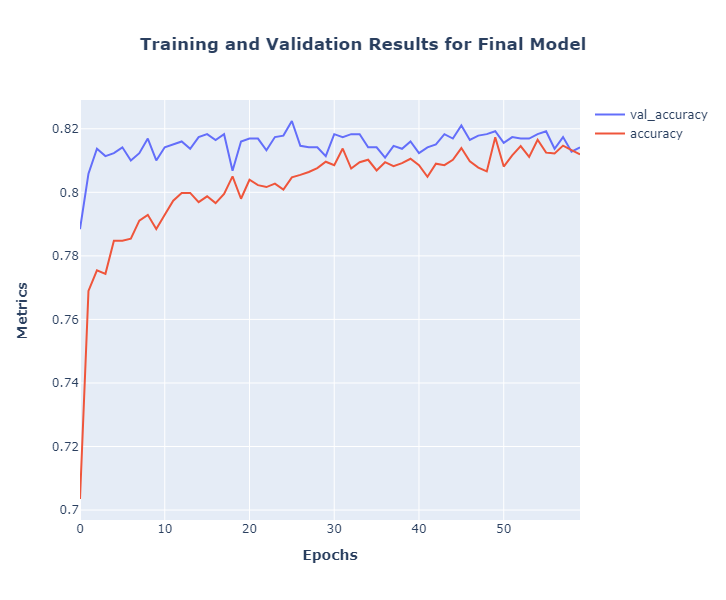

In [29]:
result = pd.DataFrame(history.history)

# Sorting lines by their last values to ensure they are in the correct order
metrics = ['accuracy', 'val_accuracy']
sorted_metrics = sorted(metrics, key=lambda x: result[x].iloc[-1], reverse=True)

# Traces for the sorted metrics
traces = []
for metric in sorted_metrics:
    trace = go.Scatter(
        x=result.index,
        y=result[metric],
        mode='lines',
        name=metric
    )
    traces.append(trace)

# Layout with centered title and bold axis titles
layout = go.Layout(
    title='<b>Training and Validation Results for Final Model</b>',
    title_x=0.5,  
    xaxis=dict(title='<b>Epochs</b>'),
    yaxis=dict(title='<b>Metrics</b>'),
    font=dict(size=12),
    height=600,  
    width=800,   
)

figure = go.Figure(data=traces, layout=layout)

figure.show()


**Observations**:

1. *Training Accuracy*:
   - The training accuracy starts at around 74% and shows a sharp increase in the initial epochs.
   - It continues to rise more gradually, reaching stability at around 80% after approximately 20 epochs.

2. *Validation Accuracy*:
   - The validation accuracy begins higher than the training accuracy, indicating the model may not be overfitting at the start.
   - It shows less volatility compared to the training accuracy and maintains above 80% after about 10 epochs.
   - There's a slight dip and rise around epoch 30, but it stabilizes thereafter.

3. *General Trends*:
   - The gap between training and validation accuracy is quite narrow throughout the training process, suggesting the model generalizes well.
   - The model does not appear to overfit, as the validation accuracy remains consistent with the training accuracy.

4. *Final Thoughts*:
   - The model achieves a stable validation accuracy quite early, which is a good indicator of its learning capability and generalization.
   - No significant overfitting is observed, as indicated by the close performance of training and validation accuracies.
   - The consistency after the 20th epoch suggests that further training may not result in substantial improvements and the model has likely reached its performance plateau.

This graph serves as a valuable tool for understanding the model's learning trajectory and ensuring that it performs well on unseen data.

### **5.2. Distribution of Wrong Predictions**

68/68 [==============================] - 0s 1ms/step


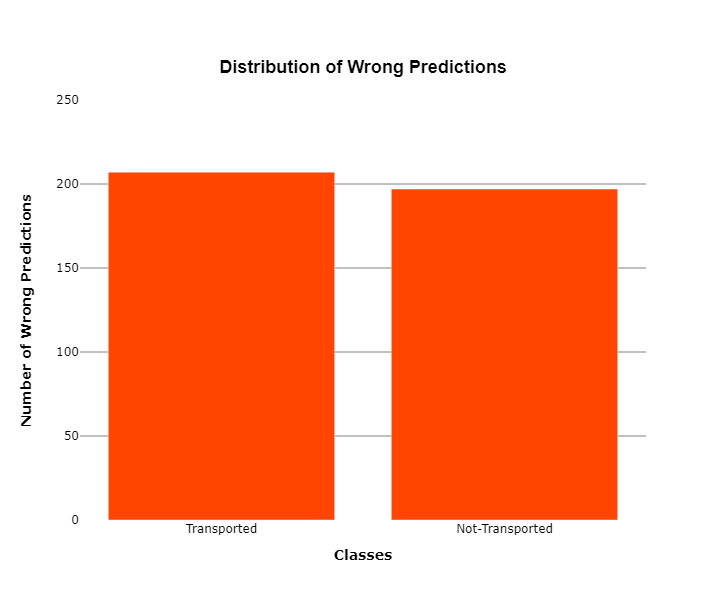

In [30]:
class_name = ['Transported', 'Not-Transported']
prediction = model.predict(x_val_scaled)
threshold = 0.5
predicted_label = np.where(prediction >= threshold, 1, 0)


labels = list(y_val)
true_label = np.array(labels)
wrong_prediction = []

#count wrong predictions
for i in range(len(true_label)):
  if predicted_label[i] != true_label[i]:
    wrong_prediction.append(predicted_label[i])

#clean wrong prediction for plotting
df = pd.DataFrame(wrong_prediction, columns=['predicted_label'])
df['predicted_label'].replace([0,1], class_name, inplace=True)
preds_dict = df['predicted_label'].value_counts().to_dict()

# Plotly figure for the bar chart
figure = go.Figure([
    go.Bar(
        x=list(preds_dict.keys()), 
        y=list(preds_dict.values()),
        marker_color='#FF4500'  
    )
])

# Update layout for the figure
figure.update_layout(
    title={'text': '<b>Distribution of Wrong Predictions<b>',
            'y':0.90,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(family="Arial, sans-serif", size=18, color='black'),
            },
    xaxis=dict(
        title='<b>Classes<b>',
        tickangle=0  
    ),
    yaxis=dict(
        title='<b>Number of Wrong Predictions<b>',
        range=[0, 250], 
        showgrid=True,  
        gridcolor='grey',  
        gridwidth=1, 
        zeroline=False,  
    ),
    xaxis_showgrid=False,  
    width=800,
    height=600,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color="black")
)

# Show the figure
figure.show()


#### **Distribution of Wrong Predictions**

The bar chart visualizes the count of incorrect predictions made by the machine learning model, distinguishing between the classes 'Transported' and 'Not-Transported'.

- The code utilizes a predictive model to assess the validation dataset (x_val_scaled).
- A threshold of 0.5 is applied to determine the predicted labels.
- The wrong_prediction array is compiled by comparing the predicted labels (predicted_label) against the true labels (true_label).

**Insights:**

- The model tends to incorrectly predict that the 'Transported' status is slightly higher than the 'Not-Transported' satus.
- This might suggest a bias in the model towards predicting transportation or a possible imbalance in the dataset that the model was trained on.
- The discrepancy between the two categories indicates areas where the model's prediction capability could be improved.


The graph serves as a crucial diagnostic tool to analyze the performance of the model, signaling potential biases that might need to be addressed to enhance its predictive accuracy.

### **5.3. Confusion Matrix**

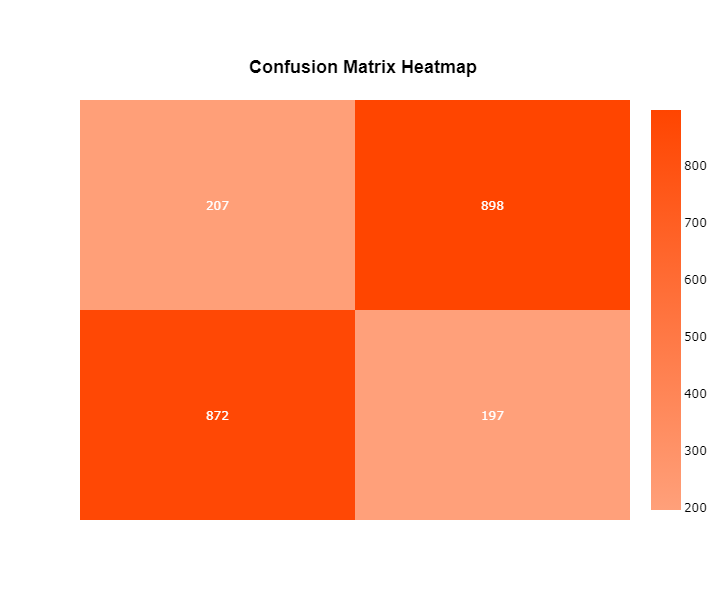

In [31]:
cm = confusion_matrix(y_val, predicted_label)

# Define a custom colorscale for black-orange gradient
colorscale = [[0, '#FFA07A'], [1, '#FF4500']]

# Convert confusion matrix 'cm' into a Plotly figure
figure = ff.create_annotated_heatmap(z=cm, colorscale=colorscale)
figure.update_layout(
    title={
        'text': '<b>Confusion Matrix Heatmap<b>',
        'y':0.90,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(family="Arial, sans-serif", size=18, color='black'),
    },
    width=800,
    height=600,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color="black"),
)

# Update colorbar to match the style in the provided image
figure['data'][0]['showscale'] = True
figure['layout']['coloraxis']['colorbar'] = {
    'title': 'Count', 
    'titleside': 'right',
    'titlefont': {'size': 14, 'family': "Arial, sans-serif"},
    'tickvals': [0, 200, 400, 600, 800],
    'ticktext': ['0', '200', '400', '600', '800'],
    'thickness': 20,
    'thicknessmode': 'pixels',
    'len': 0.5,
    'lenmode': 'fraction',
    'outlinewidth': 0
}

figure.show()


From the confusion matrix above it can be observed that the distribution false negative and false positive are quite close which means that the model is not bias in predicting the class each passenger belongs.

From a total 2,174 passengers in the validation dataset:
-	True positive: Number of passengers correctly predicted as positive. In this case 885 out of 2,174 passengers in the validation set.
-	False Positive: Number of passengers that are incorrectly predicted as transported. In this case 184 out of 2,174 passengers in the validation set.
-	True Negative: Number of passengers that are correctly predicted as not transported. In this case 899 out 2,174 passengers in the validation set.
-	False Negative: Number of passengers that are incorrectly predicted as not transported. In this case 206 out of 2,174 passengers in validation set.

## **6. Pipeline**

In [32]:
def process_data(csv):
  space_df = pd.read_csv(csv)

  for col in space_df.columns:
    if space_df[str(col)].dtypes == 'object':
      space_df[str(col)].fillna(space_df[str(col)].mode()[0], inplace=True)
    elif space_df[str(col)].dtypes == 'float64':
      space_df[str(col)].fillna(space_df[str(col)].mean().round(0), inplace=True)

  space_df[['Deck', 'Cabin_num', 'Side']] = space_df['Cabin'].str.split('/', expand=True)
  space_df['Cabin_num'] = space_df['Cabin_num'].astype(int)
  space_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = space_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].astype(int)

  space_df.loc[space_df['CryoSleep'] == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0

  space_df.loc[space_df['CryoSleep'] == True, ['VIP']] = False
  bool_column = space_df.select_dtypes(include='bool').columns

  space_df[bool_column] = space_df[bool_column].astype(bool)
  space_df_cleaned = space_df.drop(columns=[ 'PassengerId', 'Name', 'Cabin', 'Age'], axis=1)
  object_column = space_df_cleaned.select_dtypes(include='object').columns.to_list()
  df_clean1 = pd.get_dummies(space_df_cleaned, columns=object_column)

  x_test_scaled = scaler.transform(df_clean1)

 #load model
  logr_model = models.load_model('logistic_regression.h5')
  linr_model = models.load_model('linear_regression.h5')
  deep_model = models.load_model('neural_network.h5')
  final_model = models.load_model('best_model.h5')

  #make prediction
  logr_predictions = (logr_model.predict(x_test_scaled) > 0.5).astype(bool)
  linr_predictions = (linr_model.predict(x_test_scaled) > 0.5).astype(bool)
  deep_predictions = (deep_model.predict(x_test_scaled) > 0.5).astype(bool)
  final_predictions = (final_model.predict(x_test_scaled) > 0.5).astype(bool)

  logr_submission = pd.DataFrame({"PassengerId": space_df["PassengerId"],
                           "Transported": np.squeeze(logr_predictions)}).sort_values(by="PassengerId")
  linr_submission = pd.DataFrame({"PassengerId": space_df["PassengerId"],
                           "Transported": np.squeeze(linr_predictions)}).sort_values(by="PassengerId")
  deep_submission = pd.DataFrame({"PassengerId": space_df["PassengerId"],
                           "Transported": np.squeeze(deep_predictions)}).sort_values(by="PassengerId")
  final_submission = pd.DataFrame({"PassengerId": space_df["PassengerId"],
                           "Transported": np.squeeze(final_predictions)}).sort_values(by="PassengerId")
    
  logr_submission.to_csv('logreg_submission.csv', index=False)
  linr_submission.to_csv('linreg_submission.csv', index=False)
  deep_submission.to_csv('deepl_submission.csv', index=False)
  final_submission.to_csv('final_submission.csv', index=False)

  return final_submission.head()


process_data(test_data)

134/134 [==============================] - 0s 1ms/step


PassengerId  Transported
0     0013_01        False
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False

#  **7. References**

Boateng, E. Y., & Abaye, D. A. (2019). A Review of the Logistic Regression Model with Emphasis on Medical Research. Journal of Data Analysis and Information Processing, 07(04), 190–207. Retrieved February 27, 2024, from https://doi.org/10.4236/jdaip.2019.74012

Song, Y. Y., & Lu, Y. (2015). Decision tree methods: applications for classification and prediction. Shanghai archives of psychiatry, 27(2), 130–135. Retrieved February 27, 2024, from https://doi.org/10.11919/j.issn.1002-0829.215044 

What is linear regression? | IBM. (2024). IBM. Retrieved February 27, 2024, from https://www.ibm.com/topics/linear-regression#:~:text=Linear%20regression%20analysis%20is%20used,is%20called%20the%20independent%20variable. 

James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. Retrieved February 27, 2024, from https://doi.org/10.1007/978-3-031-38747-0_3 

IBM. (2021). IBM documentation. Retrieved February 27, 2024, from https://www.ibm.com/docs/en/spss-modeler/18.0.0?topic=networks-neural-model 

Addison Howard, Ashley Chow, Ryan Holbrook. (2022). Spaceship Titanic. Kaggle. https://kaggle.com/competitions/spaceship-titanic